In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/Embeded_FS/EmbededFS_results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['.ipynb_checkpoints', 'CatBoost-FS-767cases-1921-2023.ipynb', 'catboost_info', 'EGFR_subtypes_prediction_134cases_1921_newKNN19.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newKNN191.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newLR19.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newLR191.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newNB17.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newNB171.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF11.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF111.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF18.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF181.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF2-25.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF2-251.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSTACK18.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSTACK181.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSVM12.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSVM121.ipyn

In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'RF18'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/Embeded_FS/EmbededFS_results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/train-zscore.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/test-Zscore.csv")
# test1 = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testrj1921new_zscore.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
# test1=test1[data.keys()]
# test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/trainZscore-RF18.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/testZscore-RF18.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/testrjZscore-SVM20.csv",index=None)



In [4]:
test.shape

(29, 19)

In [5]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [7]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/trainZscore-RF18.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   CT_wavelet-LHH_firstorder_Maximum                         104 non-null    float64
 1   CT_lbp-3D-k_firstorder_90Percentile                       104 non-null    float64
 2   CT_wavelet-LHH_firstorder_Median                          104 non-null    float64
 3   CT_wavelet-LHH_glcm_ClusterShade                          104 non-null    float64
 4   CT_wavelet2-LLH_gldm_LargeDependenceLowGrayLevelEmphasis  104 non-null    float64
 5   CT_wavelet-LHL_glcm_ClusterShade                          104 non-null    float64
 6   CT_wavelet-HHL_glcm_Imc1                                  104 non-null    float64
 7   CT_wavelet2-HHL_firstorder_Median                         104 non-null    float64
 8   CT_wavelet2-HHH_glcm

count   mean   std  \
CT_wavelet-LHH_firstorder_Maximum                  104.000  0.000 1.005   
CT_lbp-3D-k_firstorder_90Percentile                104.000 -0.000 1.005   
CT_wavelet-LHH_firstorder_Median                   104.000 -0.000 1.005   
CT_wavelet-LHH_glcm_ClusterShade                   104.000 -0.000 1.005   
CT_wavelet2-LLH_gldm_LargeDependenceLowGrayLeve... 104.000  0.000 1.005   
CT_wavelet-LHL_glcm_ClusterShade                   104.000 -0.000 1.005   
CT_wavelet-HHL_glcm_Imc1                           104.000 -0.000 1.005   
CT_wavelet2-HHL_firstorder_Median                  104.000  0.000 1.005   
CT_wavelet2-HHH_glcm_ClusterShade                  104.000  0.000 1.005   
PET_original_shape_Elongation                      104.000 -0.000 1.005   
PET_original_shape_SurfaceVolumeRatio              104.000  0.000 1.005   
CT_wavelet-HLH_glcm_ClusterShade                   104.000 -0.000 1.005   
CT_wavelet-HHL_firstorder_Kurtosis                 104.000 -0.000 1.005   
CT_wavelet-HHH_glcm_ClusterShade                   104.000 -0.000 1.005   
CT_wavelet2-LHL_glcm_ClusterShade                  104.000 -0.000 1.005   
CT_wavelet2-LHH_firstorder_Mean                    104.000  0.000 1.005   
CT_wavelet-HLH_firstorder_Skewness                 104.000 -0.000 1.005   
CT_wavelet2-HLH_firstorder_Skewness                104.000 -0.000 1.005   
label                                              104.000  0.490 0.502   

                                                      min    10%    25%  \
CT_wavelet-LHH_firstorder_Maximum                  -1.563 -1.171 -0.833   
CT_lbp-3D-k_firstorder_90Percentile                -2.020 -1.151 -0.601   
CT_wavelet-LHH_firstorder_Median                   -2.523 -0.887 -0.257   
CT_wavelet-LHH_glcm_ClusterShade                   -2.986 -0.674 -0.092   
CT_wavelet2-LLH_gldm_LargeDependenceLowGrayLeve... -0.519 -0.458 -0.363   
CT_wavelet-LHL_glcm_ClusterShade                   -5.566 -0.558 -0.117   
CT_wavelet-HHL_glcm_Imc1                           -4.239 -1.075 -0.440   
CT_wavelet2-HHL_firstorder_Median                  -3.068 -0.748 -0.286   
CT_wavelet2-HHH_glcm_ClusterShade                  -3.237 -0.697 -0.272   
PET_original_shape_Elongation                      -3.668 -1.345 -0.372   
PET_original_shape_SurfaceVolumeRatio              -1.874 -1.321 -0.648   
CT_wavelet-HLH_glcm_ClusterShade                   -5.272 -0.432 -0.075   
CT_wavelet-HHL_firstorder_Kurtosis                 -0.517 -0.396 -0.319   
CT_wavelet-HHH_glcm_ClusterShade                   -3.168 -0.860 -0.326   
CT_wavelet2-LHL_glcm_ClusterShade                  -5.317 -0.551 -0.186   
CT_wavelet2-LHH_firstorder_Mean                    -2.348 -1.135 -0.412   
CT_wavelet-HLH_firstorder_Skewness                 -3.106 -0.674 -0.250   
CT_wavelet2-HLH_firstorder_Skewness                -2.696 -1.026 -0.407   
label                                               0.000  0.000  0.000   

                                                      50%    75%   90%   95%  \
CT_wavelet-LHH_firstorder_Maximum                  -0.093  0.629 1.413 1.621   
CT_lbp-3D-k_firstorder_90Percentile                -0.158  0.371 1.389 1.998   
CT_wavelet-LHH_firstorder_Median                   -0.044  0.237 0.609 0.959   
CT_wavelet-LHH_glcm_ClusterShade                    0.049  0.173 0.418 0.660   
CT_wavelet2-LLH_gldm_LargeDependenceLowGrayLeve... -0.222 -0.023 0.453 0.809   
CT_wavelet-LHL_glcm_ClusterShade                    0.074  0.147 0.313 0.599   
CT_wavelet-HHL_glcm_Imc1                            0.326  0.670 0.867 0.931   
CT_wavelet2-HHL_firstorder_Median                  -0.063  0.182 0.794 1.635   
CT_wavelet2-HHH_glcm_ClusterShade                  -0.027  0.165 0.694 1.111   
PET_original_shape_Elongation                       0.123  0.669 1.167 1.280   
PET_original_shape_SurfaceVolumeRatio              -0.044  0.756 1.277 1.579   
CT_wavelet-HLH_glcm_ClusterShade                    0.012  0.053 0.178 0.488   
CT_wavelet-

In [8]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_wavelet-LHH_firstorder_Maximum                           0
PET_original_shape_SurfaceVolumeRatio                       0
CT_wavelet2-HLH_firstorder_Skewness                         0
CT_wavelet-HLH_firstorder_Skewness                          0
CT_wavelet2-LHH_firstorder_Mean                             0
CT_wavelet2-LHL_glcm_ClusterShade                           0
CT_wavelet-HHH_glcm_ClusterShade                            0
CT_wavelet-HHL_firstorder_Kurtosis                          0
CT_wavelet-HLH_glcm_ClusterShade                            0
PET_original_shape_Elongation                               0
CT_lbp-3D-k_firstorder_90Percentile                         0
CT_wavelet2-HHH_glcm_ClusterShade                           0
CT_wavelet2-HHL_firstorder_Median                           0
CT_wavelet-HHL_glcm_Imc1                                    0
CT_wavelet-LHL_glcm_ClusterShade                            0
CT_wavelet2-LLH_gldm_LargeDependenceLowGrayLevelEmphasis    0
CT_wavel

In [22]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.431818
Naive Bayes: 0.613636
KNN: 0.281818
SVM: 0.518182
ANN: 0.477273
CART: 0.622727
BaggedTrees: 0.709091
RF: 0.763636
AdaBoost: 0.527273
GBM: 0.759091
XGBoost: 0.763636
LightGBM: 0.713636
CatBoost: 0.809091
NGBoost: 0.568182

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.723          0.432
1          Naive Bayes           0.624          0.614
2                  KNN           0.627          0.282
3                  SVM           0.782          0.518
4                  ANN           0.976          0.477
5                 CART           1.000          0.623
6          BaggedTrees           1.000          0.709
7                   RF           1.000          0.764
8             AdaBoost           1.000          0.527
9                  GBM           1.000          0.759
10

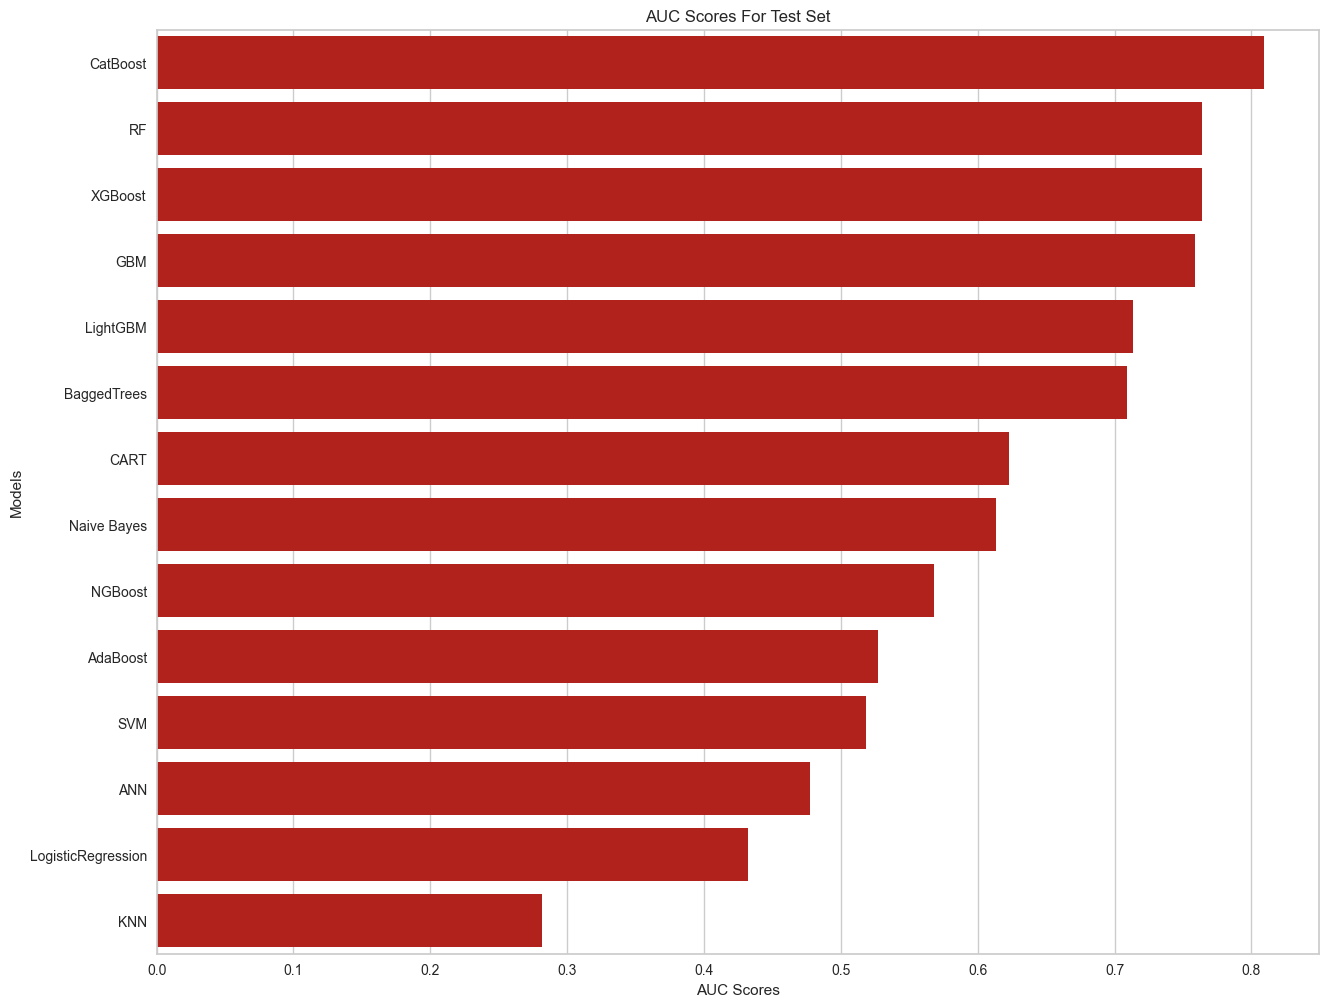

In [23]:
evaluate_classification_model_holdout(base_models)



In [24]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [30]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.43181818181818177

In [31]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF181-LR73', Save_format = 'csv',Save_type = 'col')

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF181-LR73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.44      0.36      0.40        11
    EGFR E21       0.42      0.50      0.45        10

    accuracy                           0.43        21
   macro avg       0.43      0.43      0.43        21
weighted avg       0.43      0.43      0.43        21

precision 0.4166666666666667 accuracy 0.42857142857142855 recall 0.5 auc 0.43181818181818177


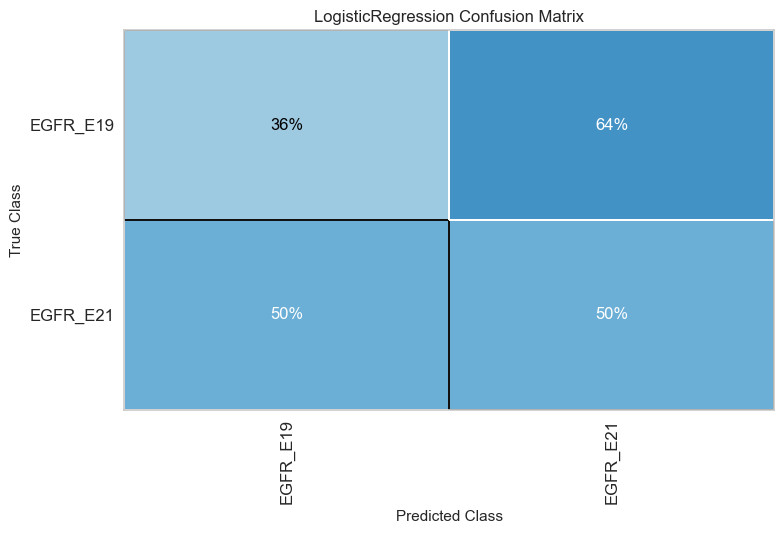

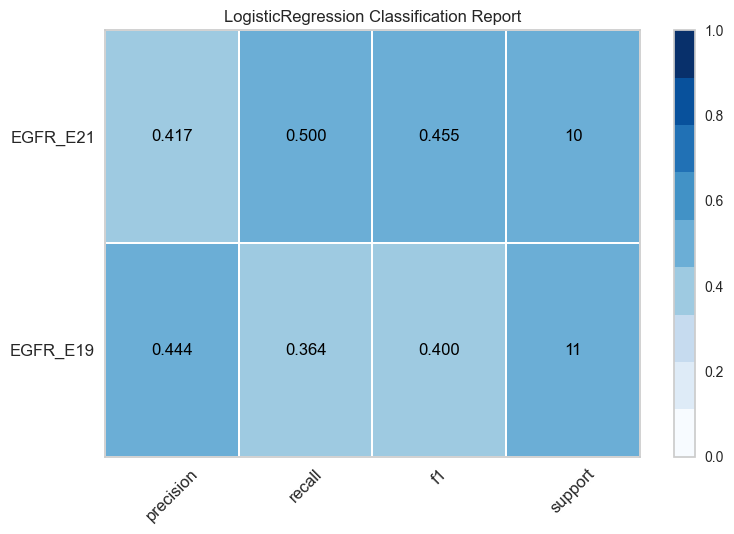

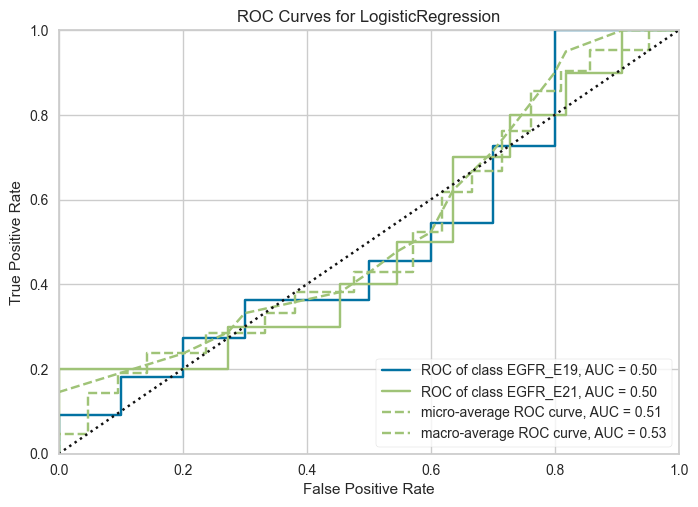

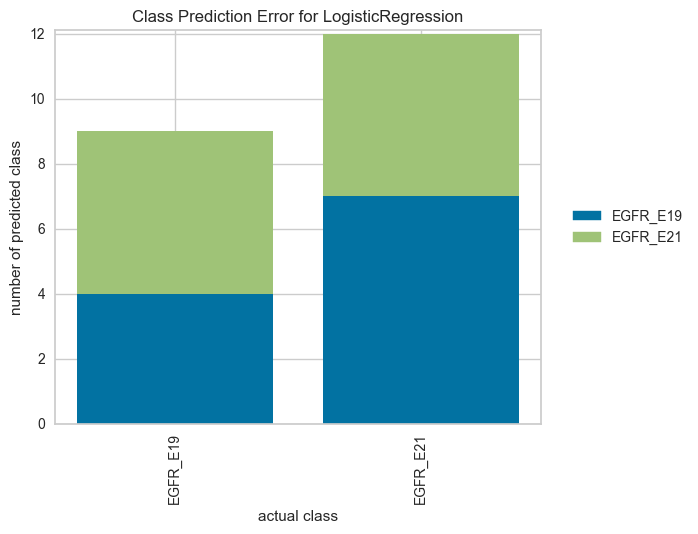

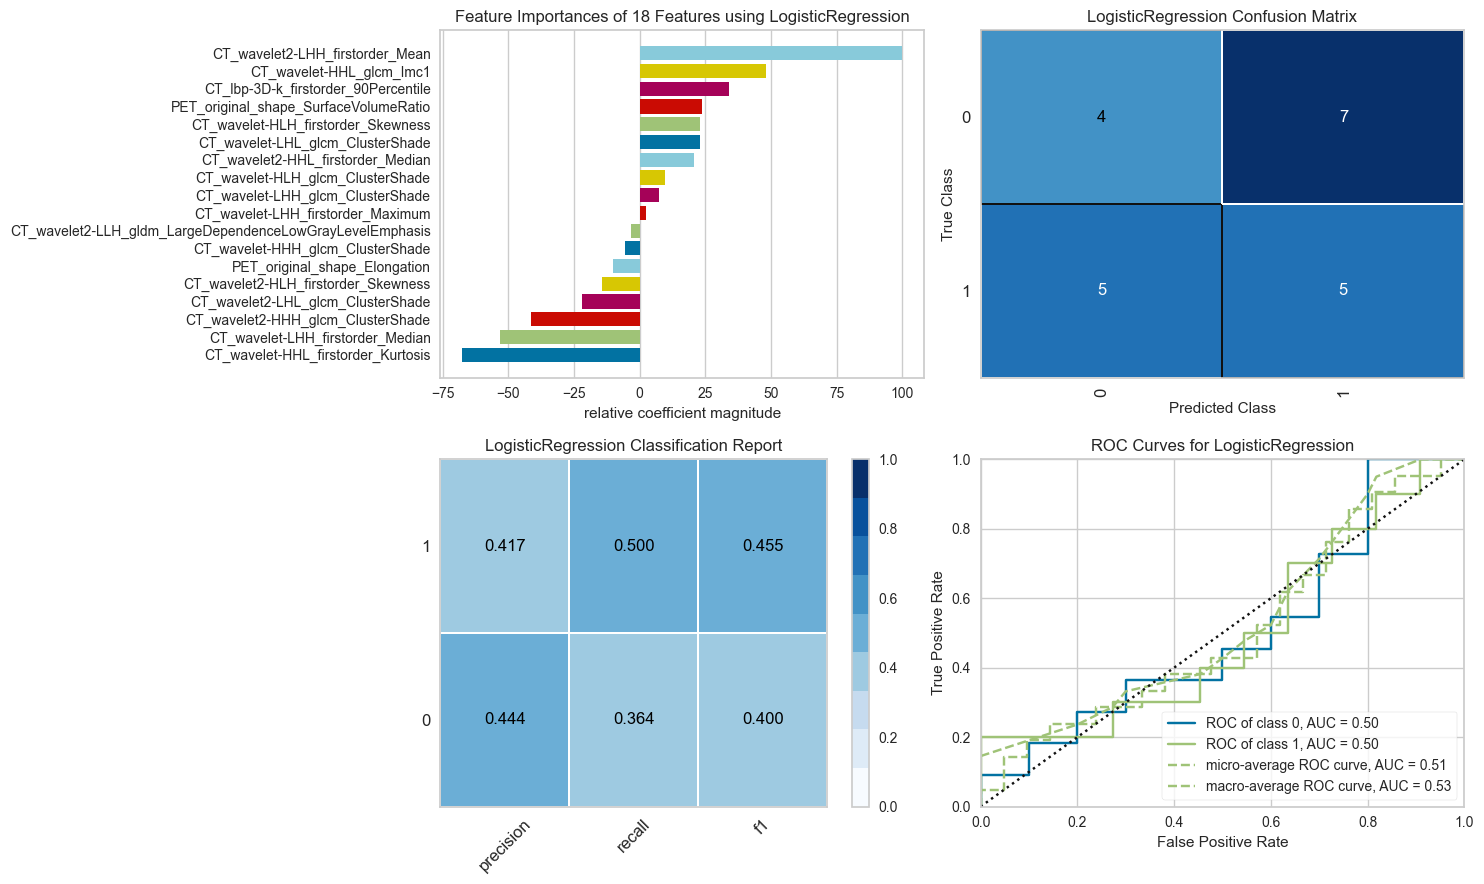

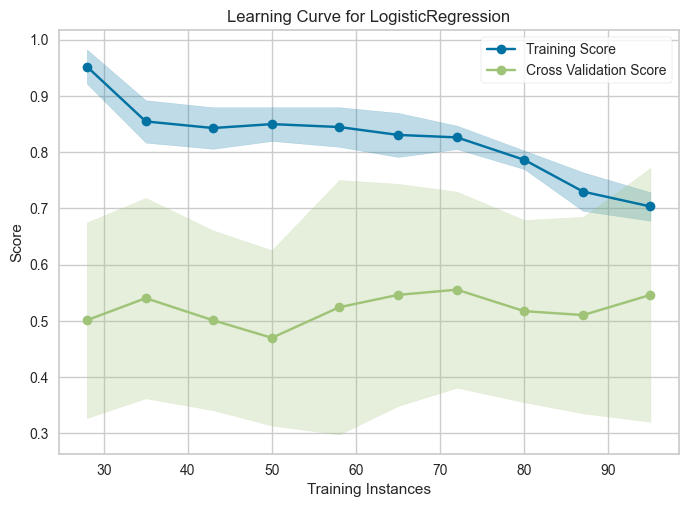

In [33]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [36]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.7136363636363636

In [37]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF181-RF73', Save_format = 'csv',Save_type = 'col')

In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF181-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.73      0.73      0.73        11
    EGFR E21       0.70      0.70      0.70        10

    accuracy                           0.71        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.71      0.71      0.71        21

precision 0.7 accuracy 0.7142857142857143 recall 0.7 auc 0.7136363636363636


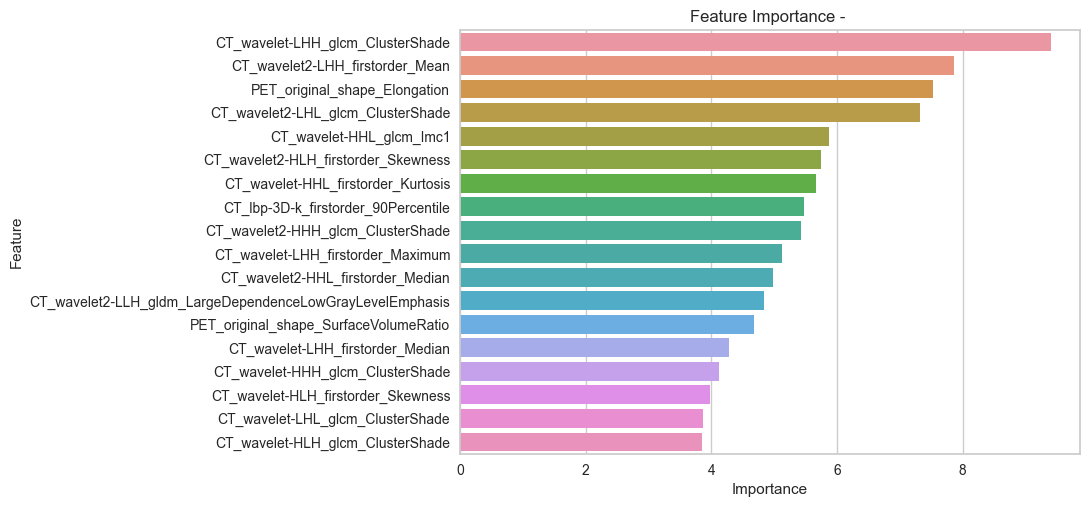

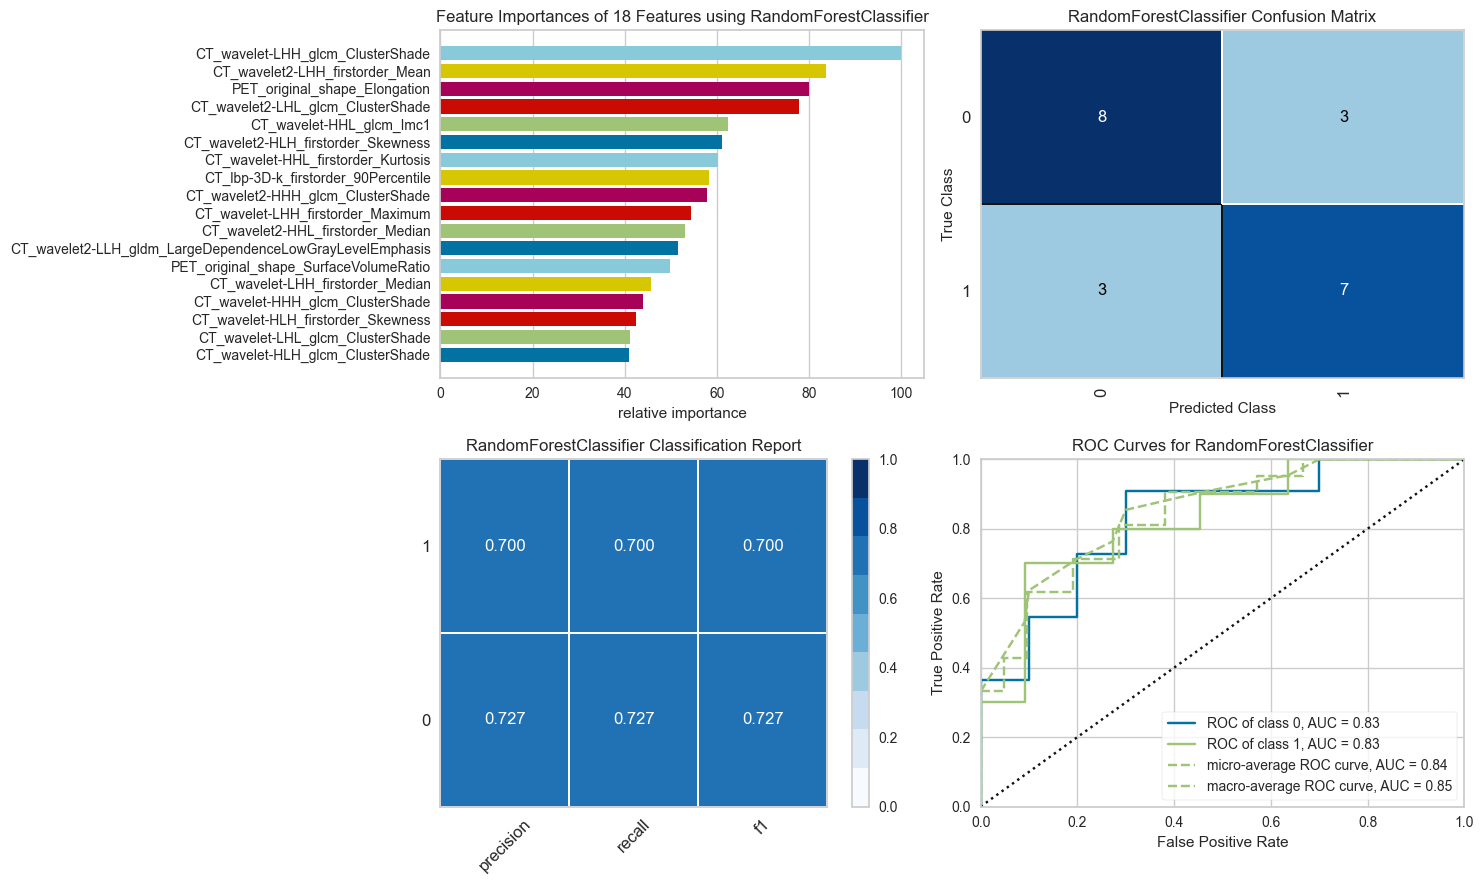

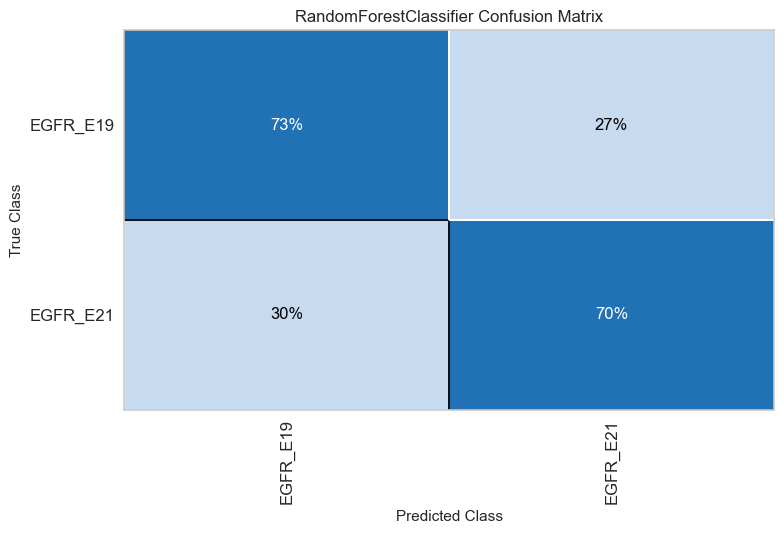

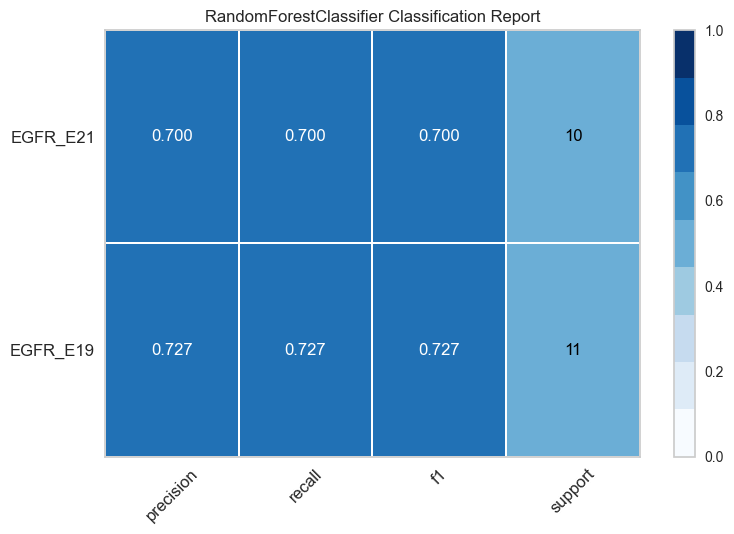

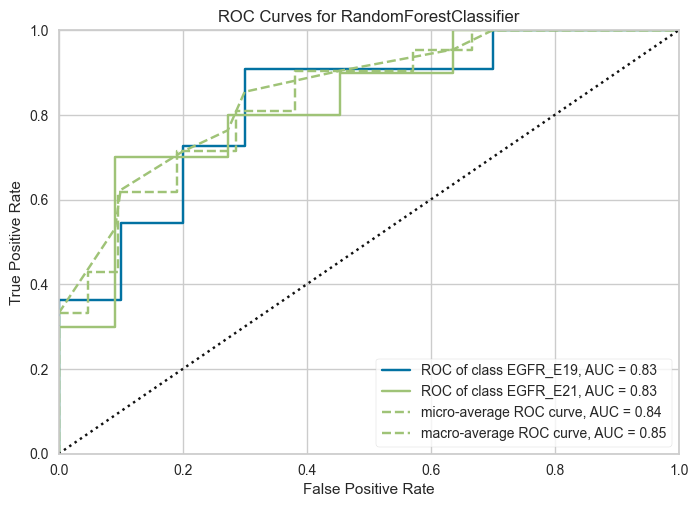

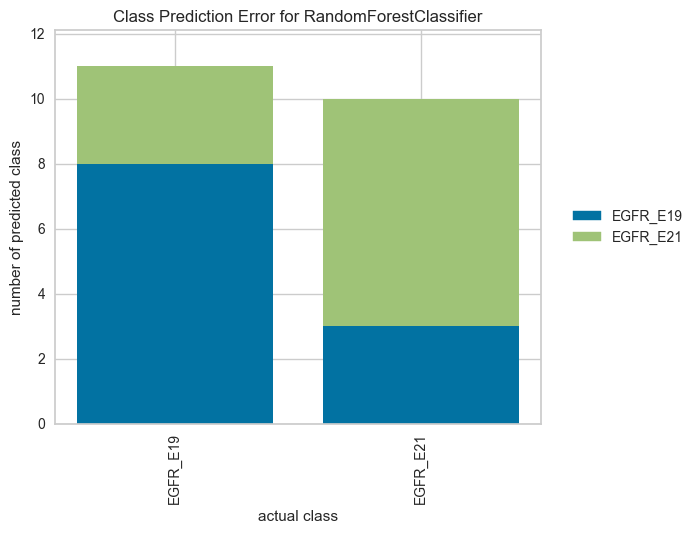

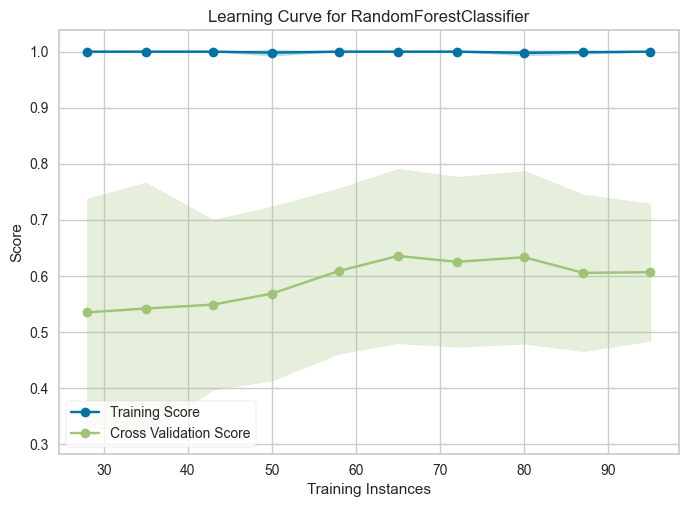

In [39]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [41]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6860510	total: 596us	remaining: 298ms
1:	learn: 0.6776579	total: 1.24ms	remaining: 308ms
2:	learn: 0.6718270	total: 1.71ms	remaining: 283ms
3:	learn: 0.6619279	total: 2.12ms	remaining: 262ms
4:	learn: 0.6503784	total: 2.5ms	remaining: 248ms
5:	learn: 0.6350582	total: 2.89ms	remaining: 238ms
6:	learn: 0.6258264	total: 3.27ms	remaining: 230ms
7:	learn: 0.6170739	total: 3.64ms	remaining: 224ms
8:	learn: 0.6107329	total: 4.08ms	remaining: 222ms
9:	learn: 0.6016357	total: 4.57ms	remaining: 224ms
10:	learn: 0.5866378	total: 5ms	remaining: 222ms
11:	learn: 0.5756072	total: 5.39ms	remaining: 219ms
12:	learn: 0.5657864	total: 5.82ms	remaining: 218ms
13:	learn: 0.5589144	total: 6.27ms	remaining: 218ms
14:	learn: 0.5520324	total: 6.67ms	remaining: 216ms
15:	learn: 0.5473911	total: 7.11ms	remaining: 215ms
16:	learn: 0.5409911	total: 7.55ms	remaining: 214ms
17:	learn: 0.5371478	total: 7.94ms	remaining: 213ms
18:	learn: 0.5301664	total: 8.34ms	remaining: 211ms
19:	learn: 0.5217904	total:

392:	learn: 0.0204543	total: 157ms	remaining: 42.8ms
393:	learn: 0.0203804	total: 158ms	remaining: 42.4ms
394:	learn: 0.0203728	total: 158ms	remaining: 42ms
395:	learn: 0.0202191	total: 159ms	remaining: 41.6ms
396:	learn: 0.0202049	total: 159ms	remaining: 41.2ms
397:	learn: 0.0201913	total: 159ms	remaining: 40.8ms
398:	learn: 0.0201255	total: 160ms	remaining: 40.4ms
399:	learn: 0.0201125	total: 160ms	remaining: 40ms
400:	learn: 0.0200429	total: 161ms	remaining: 39.6ms
401:	learn: 0.0200303	total: 161ms	remaining: 39.2ms
402:	learn: 0.0199597	total: 161ms	remaining: 38.8ms
403:	learn: 0.0199472	total: 162ms	remaining: 38.4ms
404:	learn: 0.0198008	total: 162ms	remaining: 38ms
405:	learn: 0.0197888	total: 162ms	remaining: 37.6ms
406:	learn: 0.0197773	total: 163ms	remaining: 37.2ms
407:	learn: 0.0197137	total: 163ms	remaining: 36.8ms
408:	learn: 0.0197026	total: 164ms	remaining: 36.4ms
409:	learn: 0.0196364	total: 164ms	remaining: 36ms
410:	learn: 0.0196249	total: 164ms	remaining: 35.6ms
4

0.7142857142857143

In [42]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [43]:
# shap.dependence_plot(y_train, shap_values, X_train)

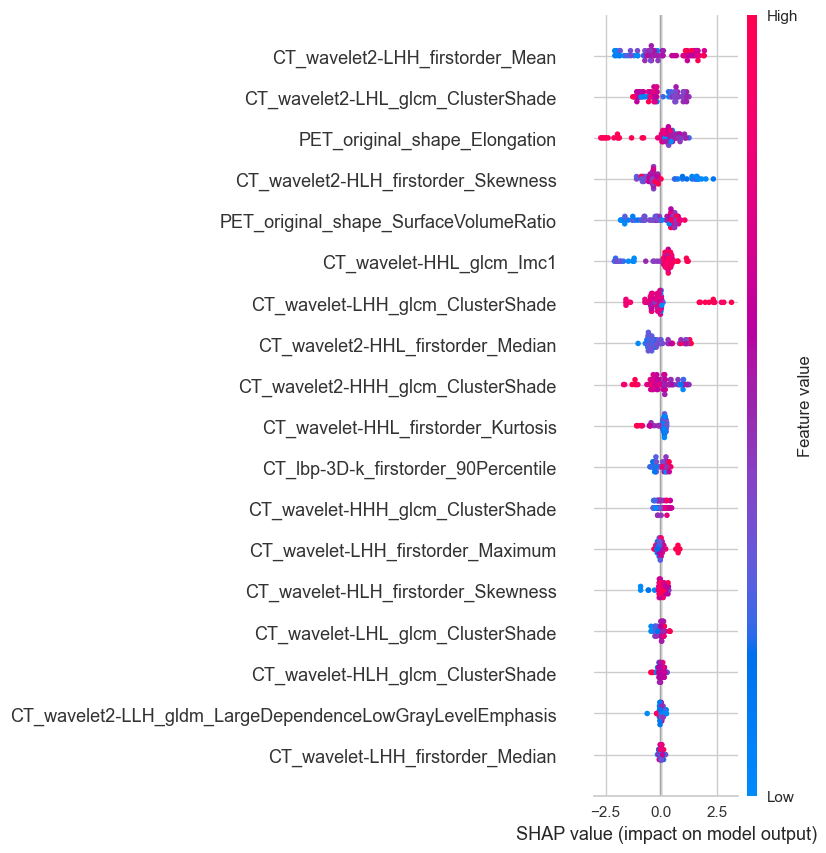

In [44]:

shap.summary_plot(shap_values, X_train)

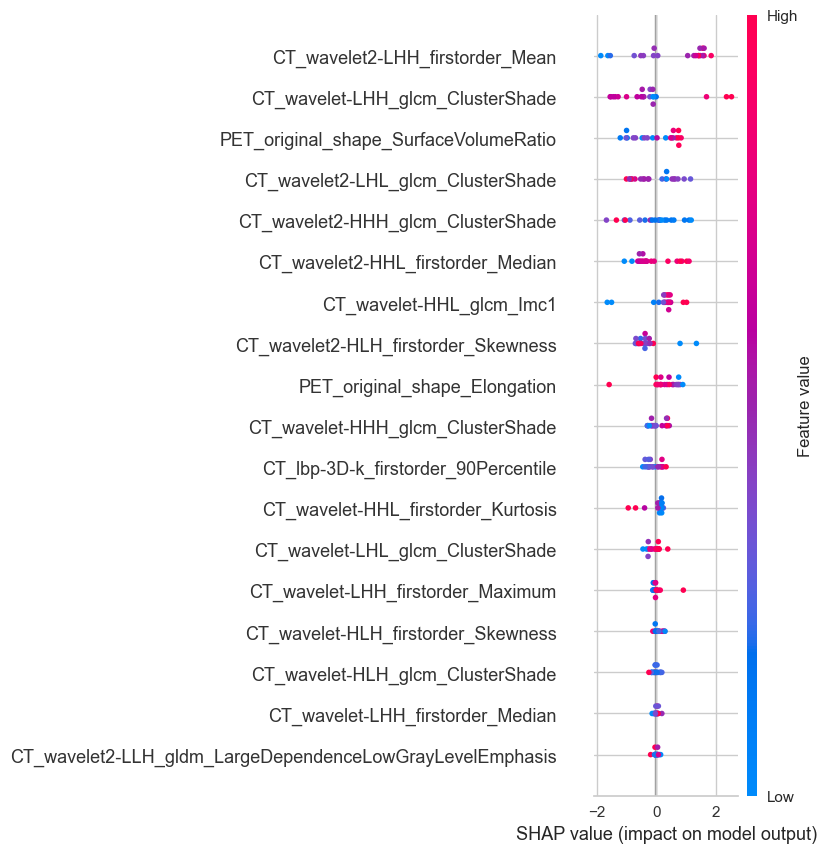

In [45]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [46]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [47]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF181-CBC73', Save_format = 'csv',Save_type = 'col')

In [48]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF181-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.73      0.73      0.73        11
    EGFR E21       0.70      0.70      0.70        10

    accuracy                           0.71        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.71      0.71      0.71        21

precision 0.7 accuracy 0.7142857142857143 recall 0.7 auc 0.7136363636363636


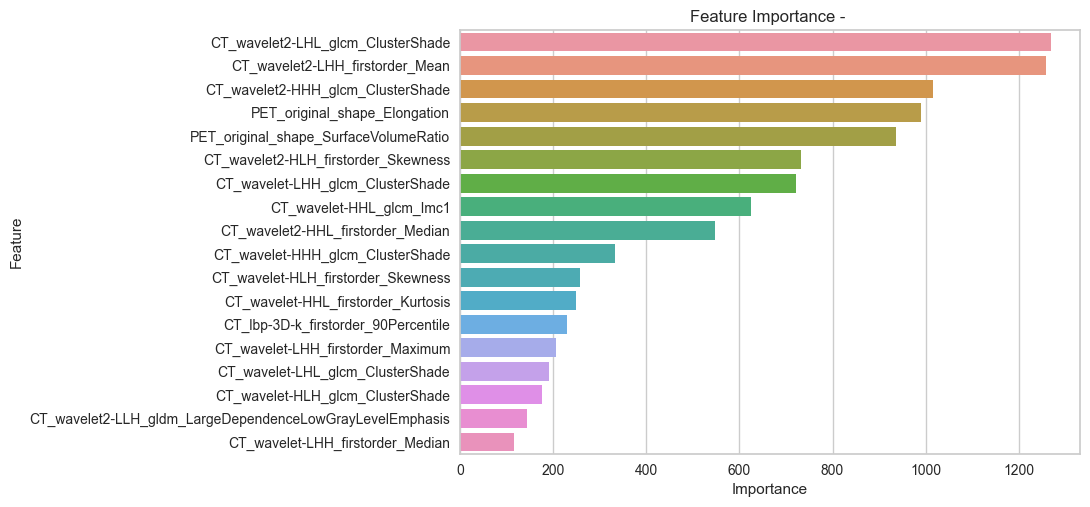

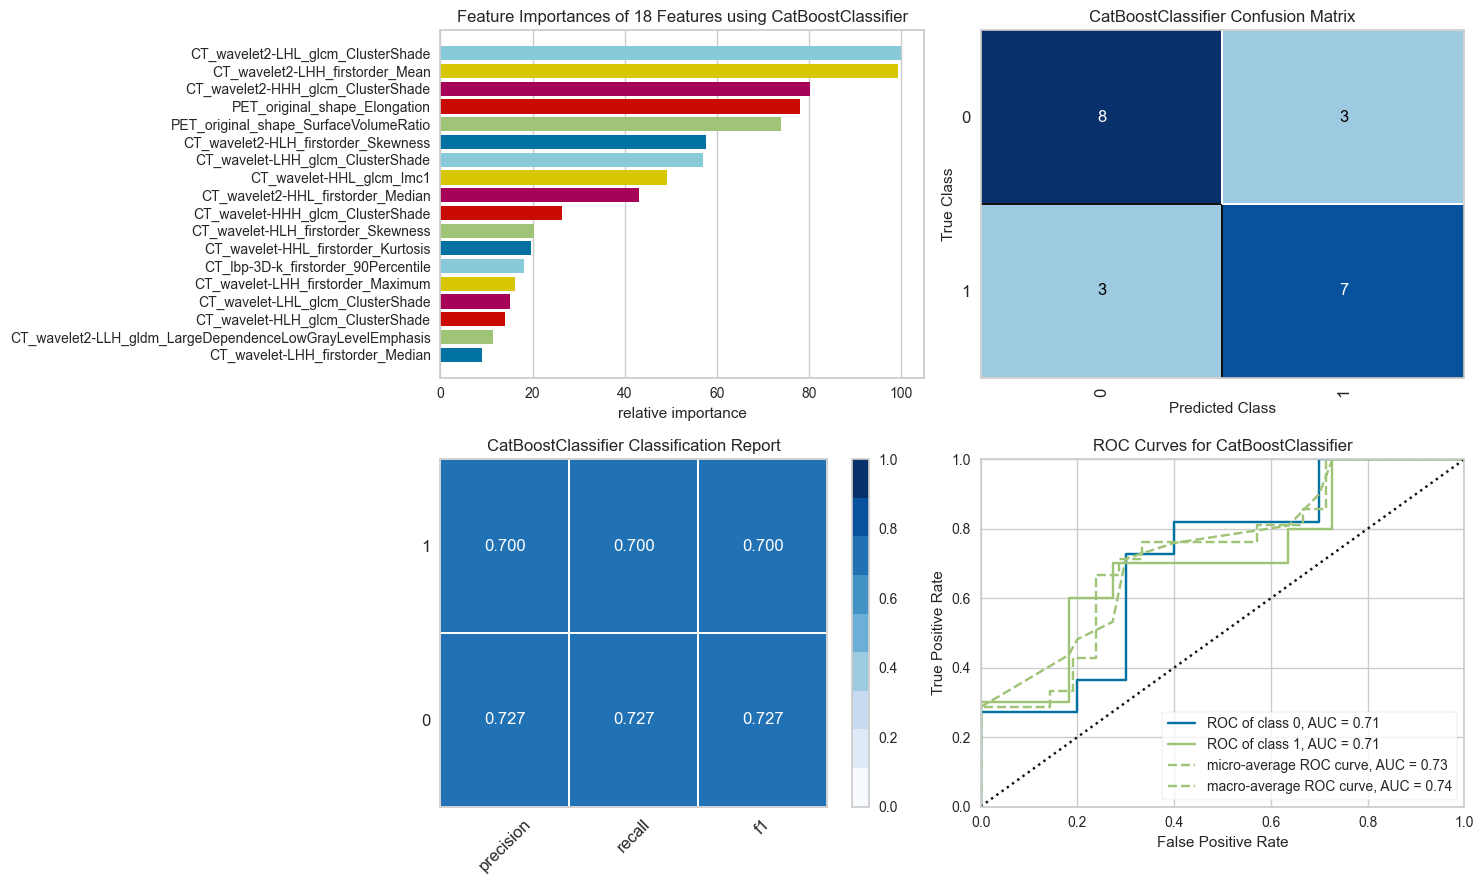

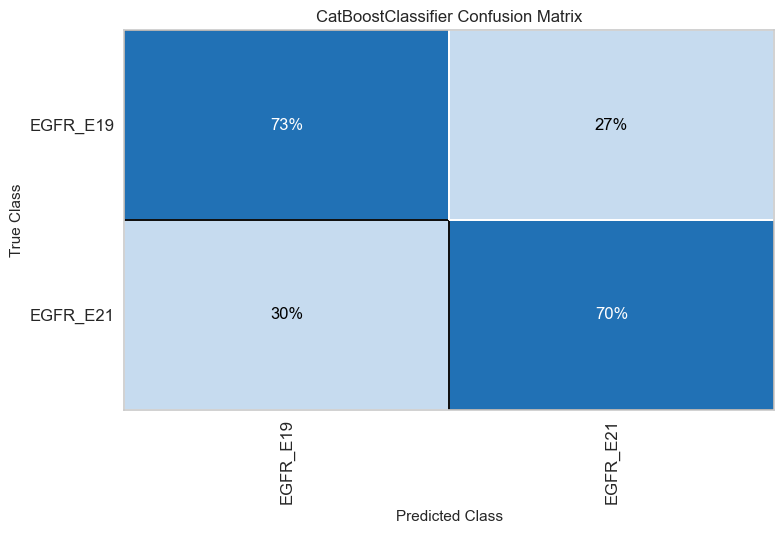

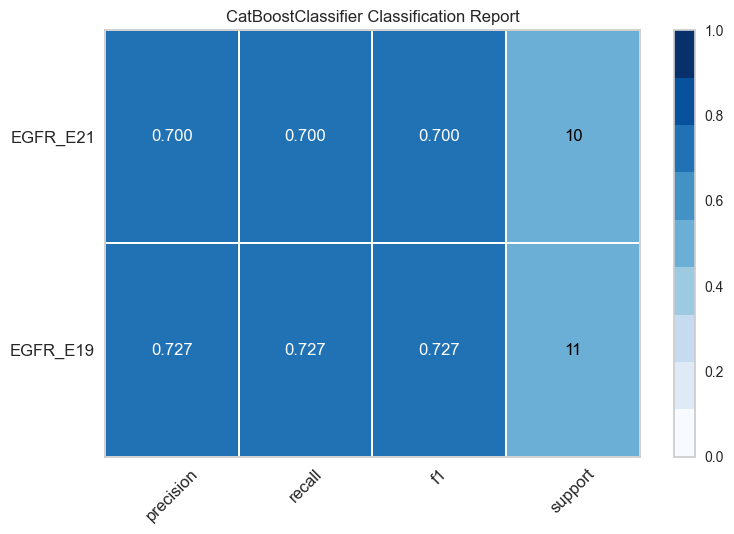

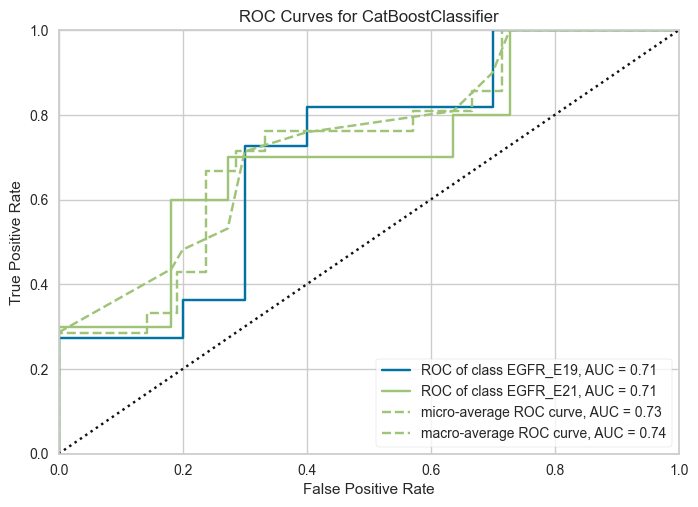

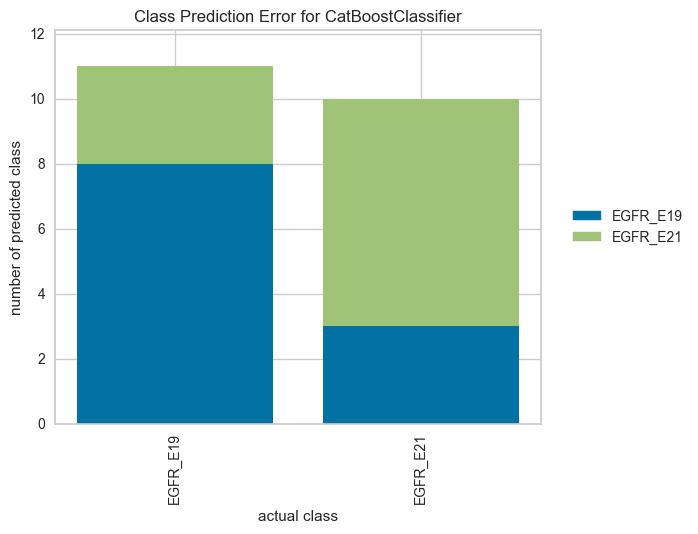

TypeError: __init__() got an unexpected keyword argument 'iterations'

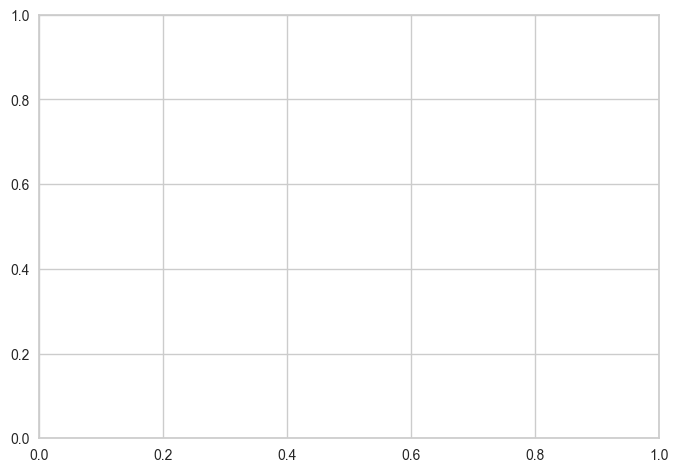

In [49]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [51]:
# Final Model
ngb_tuned = NGBClassifier(**ngb_cv_model.best_params_).fit(X_train, y_train)
y_pred = ngb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.1695 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.1695 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.1695 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.1695 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.1695 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.1695 val_loss=0.00

0.5238095238095238

In [52]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF181-NGB73', Save_format = 'csv',Save_type = 'col')

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF181-NGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.55      0.55      0.55        11
    EGFR E21       0.50      0.50      0.50        10

    accuracy                           0.52        21
   macro avg       0.52      0.52      0.52        21
weighted avg       0.52      0.52      0.52        21

precision 0.5 accuracy 0.5238095238095238 recall 0.5 auc 0.5227272727272727


In [54]:
# # # # Visualization of Results --> Feature Importances
# # # ngb_tuned = wrap(ngb_tuned)
# # # # plot_feature_importances(ngb_tuned)

# # # report_results_quickly(ngb_tuned)
# # # plot_results(ngb_tuned)
# # # plot_learning_curve(ngb_tuned)

# plot_confusion_matrix_yb(ngb_tuned)
# plot_classification_report_yb(ngb_tuned)
# plot_roc_auc_curve_yb(ngb_tuned)
# plot_class_prediction_error_yb(ngb_tuned)

In [56]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.5238095238095238

In [57]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF181-ADB73', Save_format = 'csv',Save_type = 'col')

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF181-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.55      0.55      0.55        11
    EGFR E21       0.50      0.50      0.50        10

    accuracy                           0.52        21
   macro avg       0.52      0.52      0.52        21
weighted avg       0.52      0.52      0.52        21

precision 0.5 accuracy 0.5238095238095238 recall 0.5 auc 0.5227272727272727


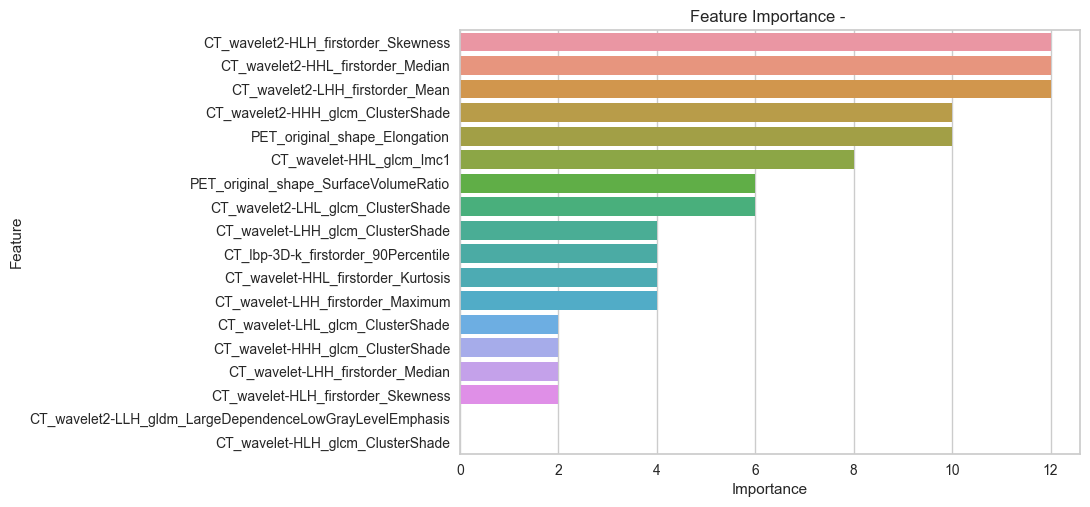

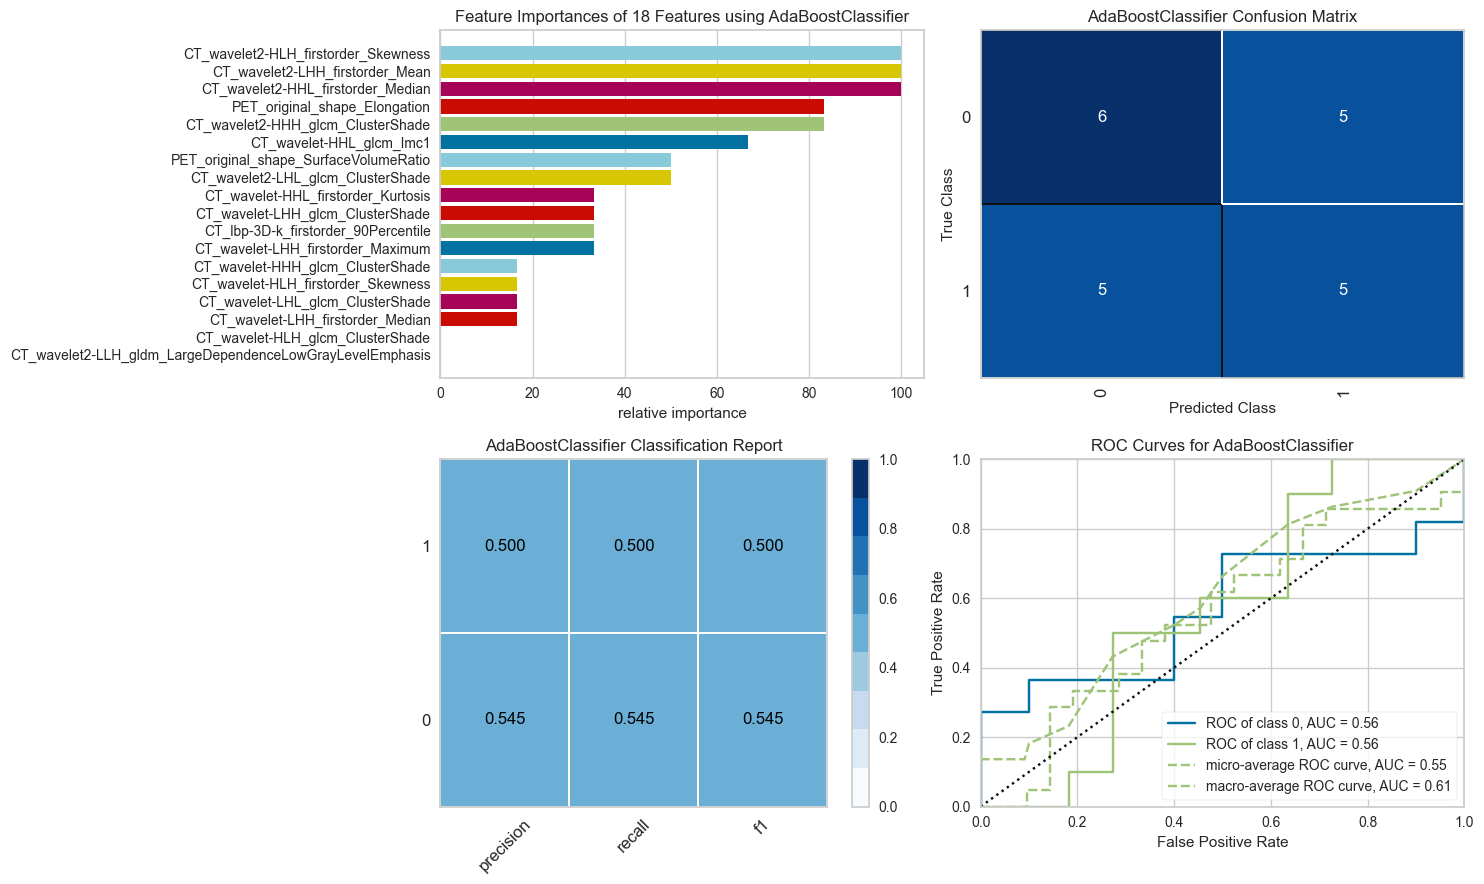

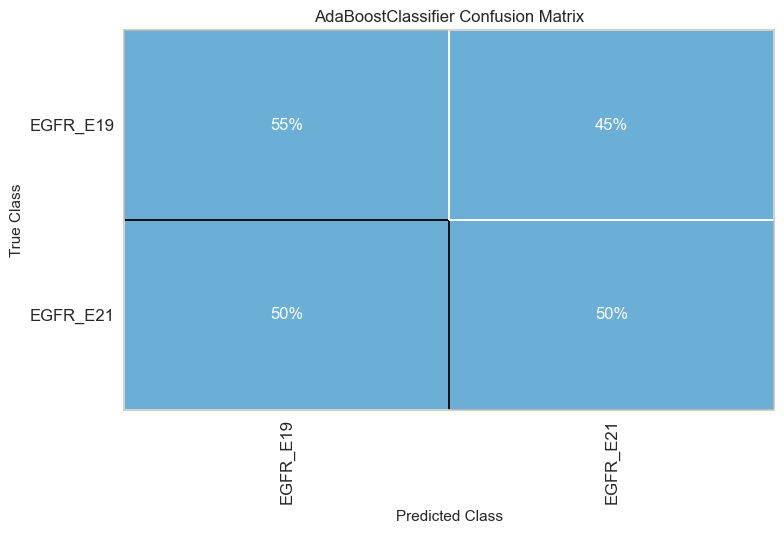

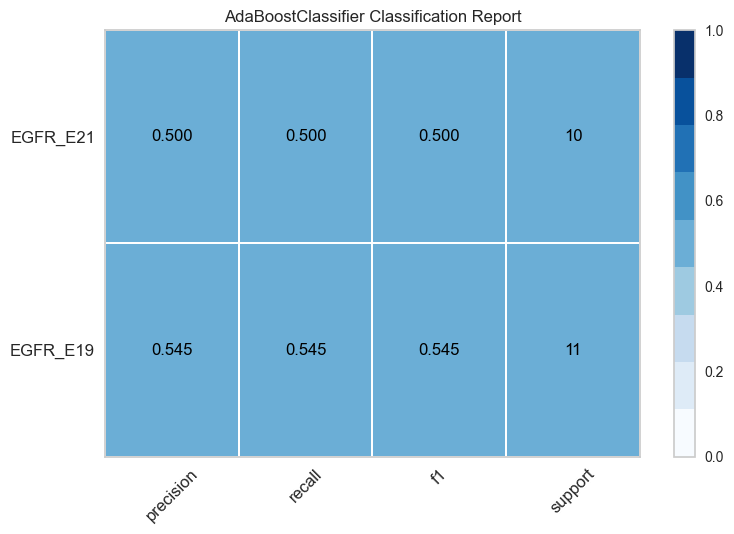

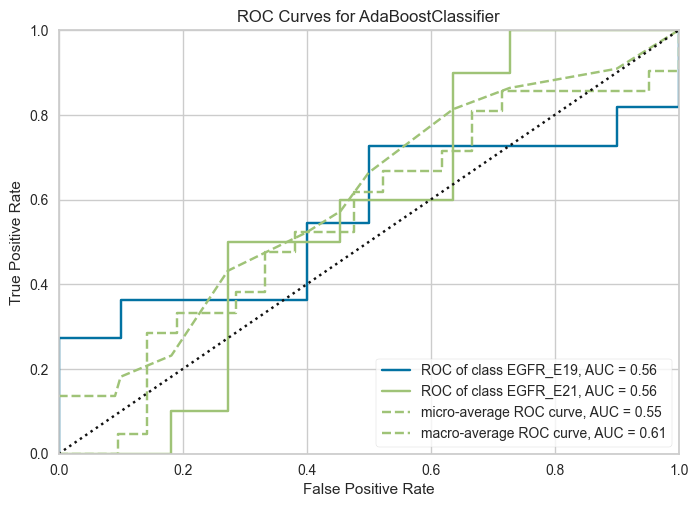

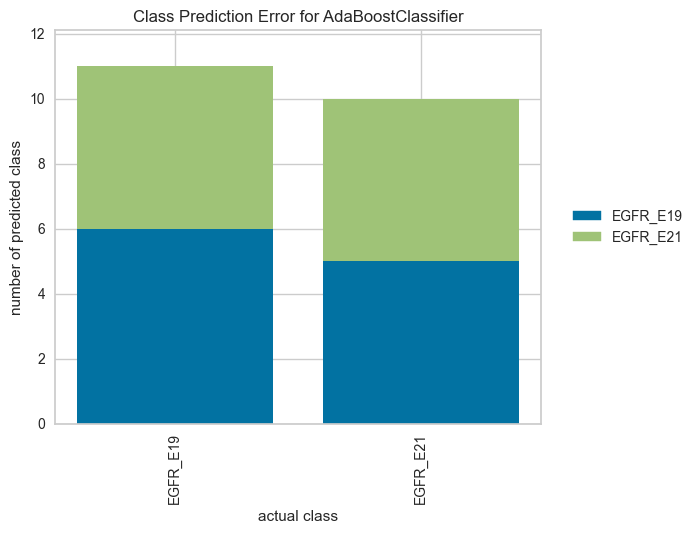

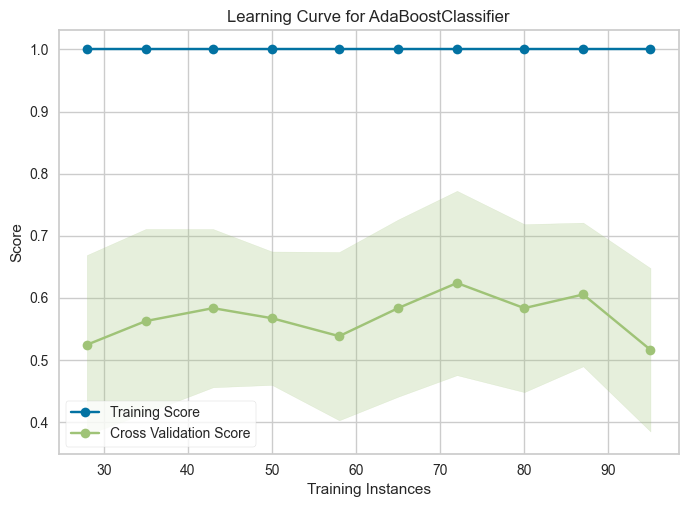

In [59]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)

report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [61]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6666666666666666

In [62]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF181-gbdt', Save_format = 'csv',Save_type = 'col')

In [63]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF181-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.67      0.73      0.70        11
    EGFR E21       0.67      0.60      0.63        10

    accuracy                           0.67        21
   macro avg       0.67      0.66      0.66        21
weighted avg       0.67      0.67      0.67        21

precision 0.6666666666666666 accuracy 0.6666666666666666 recall 0.6 auc 0.6636363636363637


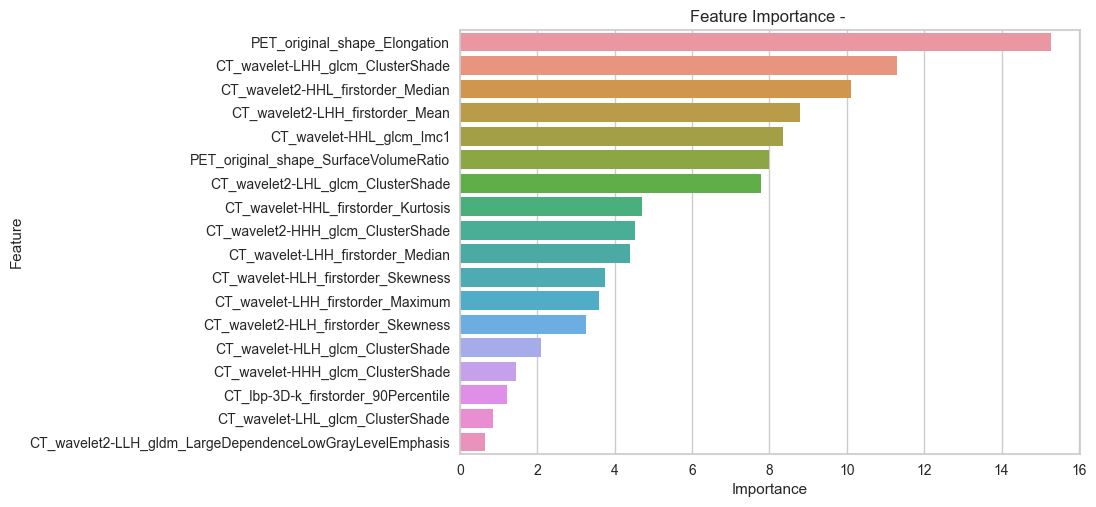

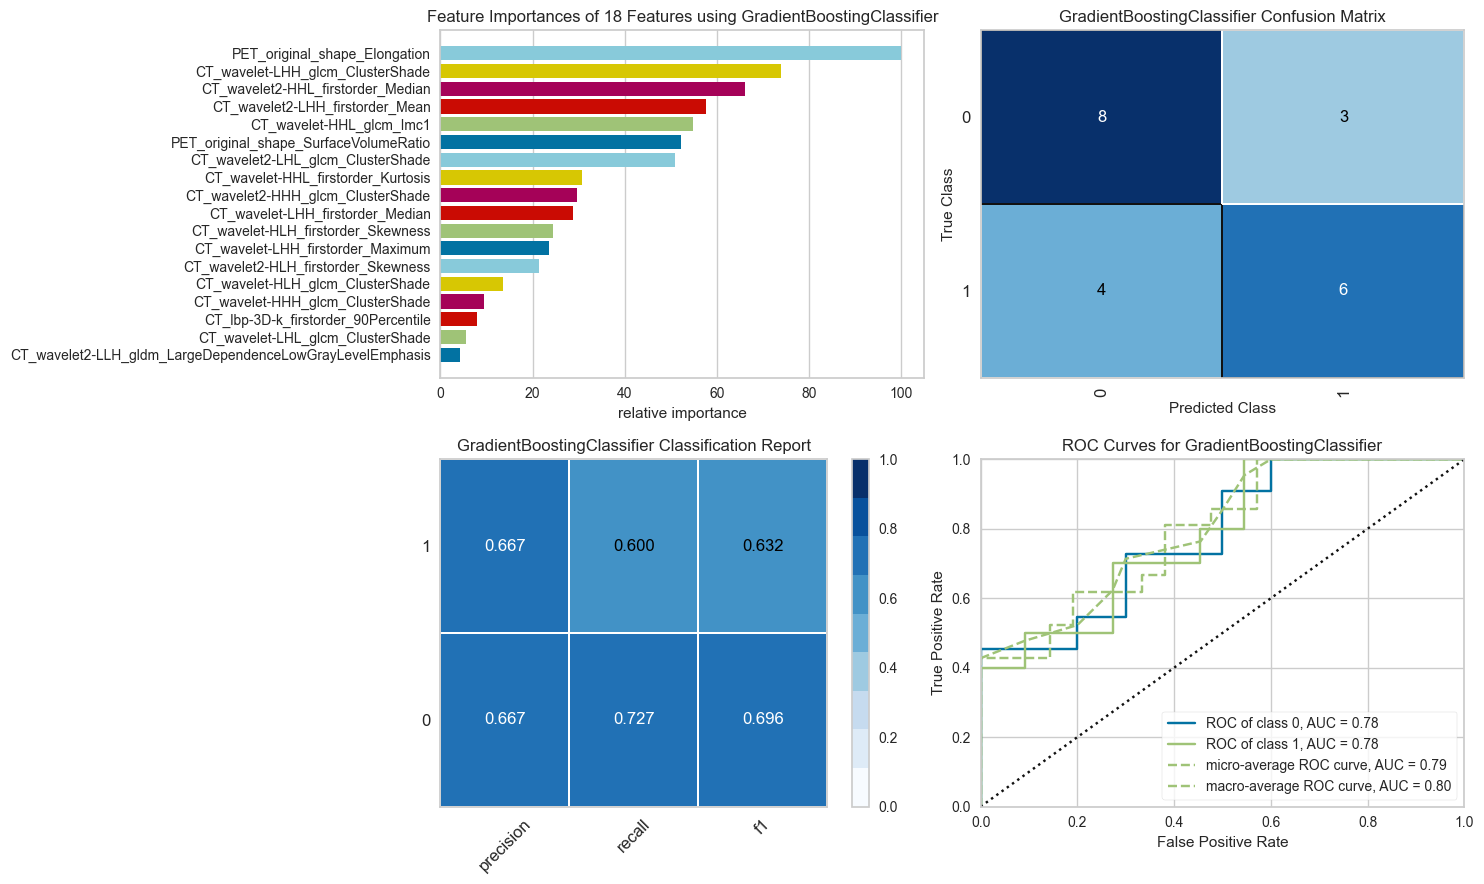

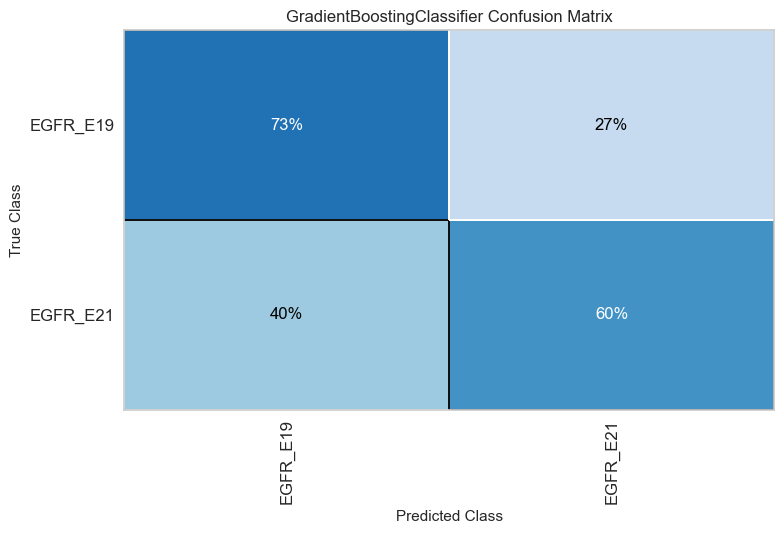

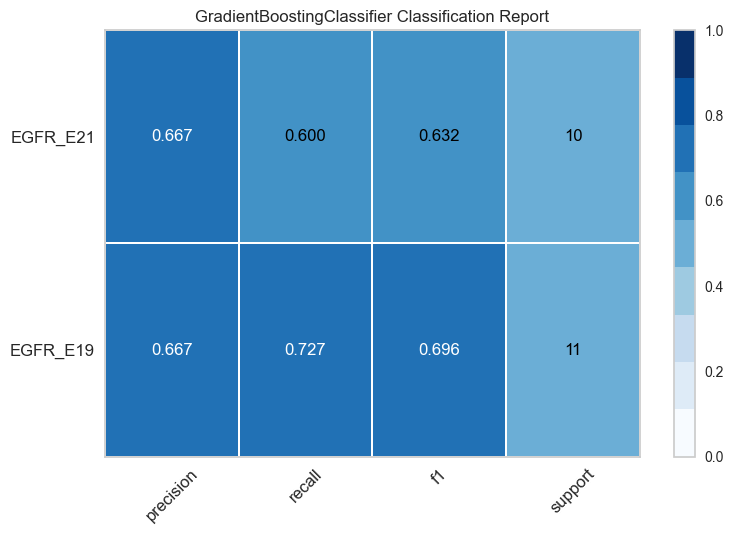

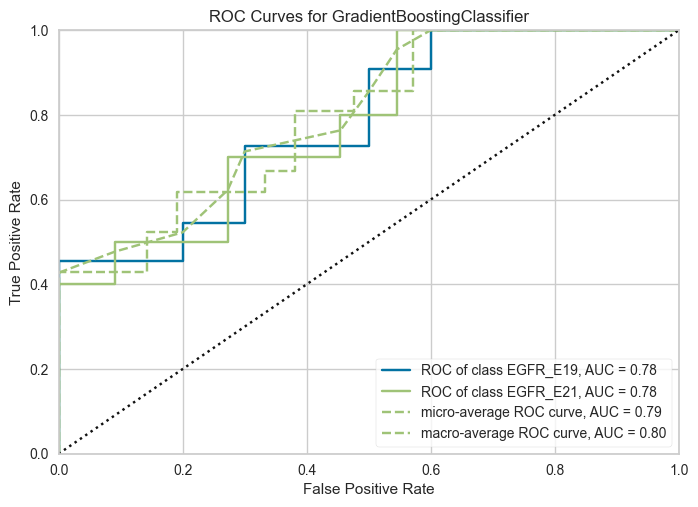

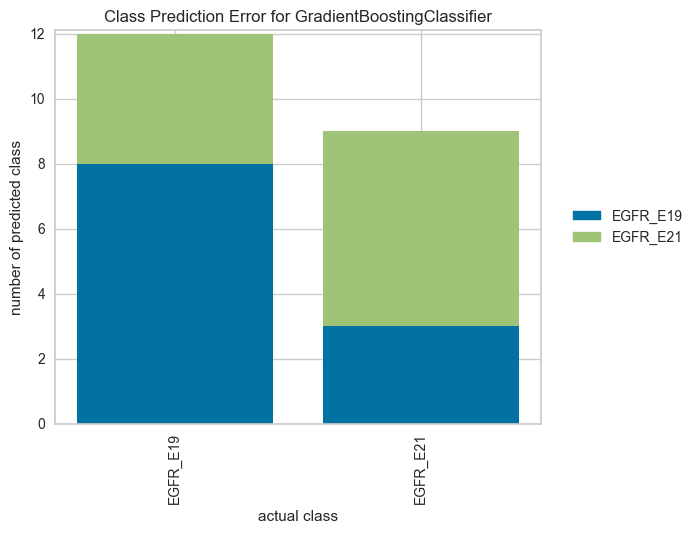

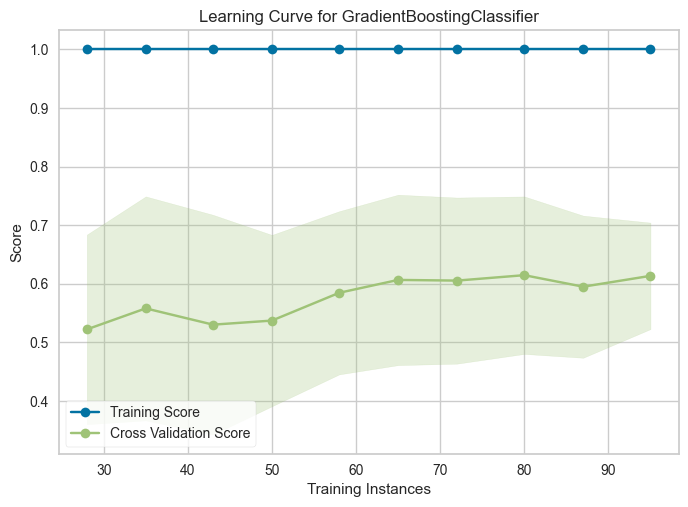

In [64]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [65]:
# dt_model = DecisionTreeClassifier()
# DecisionTreeClassifier.estimator.get_params().keys()

In [72]:
print(svm_model.best_params_)

{'C': 10, 'kernel': 'linear'}


In [73]:
# Final Model
svm_tuned = svm.SVC(**svm_model.best_params_).fit(X_train, y_train)
y_pred = svm_tuned.predict(X_test)
ACC = accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score = roc_auc_score(y_test, y_pred)

print(ACC,roc_auc_score)

0.5238095238095238 0.5272727272727273


In [74]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF181-SVM73', Save_format = 'csv',Save_type = 'col')

In [75]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF181-SVM73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.56      0.45      0.50        11
    EGFR E21       0.50      0.60      0.55        10

    accuracy                           0.52        21
   macro avg       0.53      0.53      0.52        21
weighted avg       0.53      0.52      0.52        21

precision 0.5 accuracy 0.5238095238095238 recall 0.6 auc 0.5272727272727273


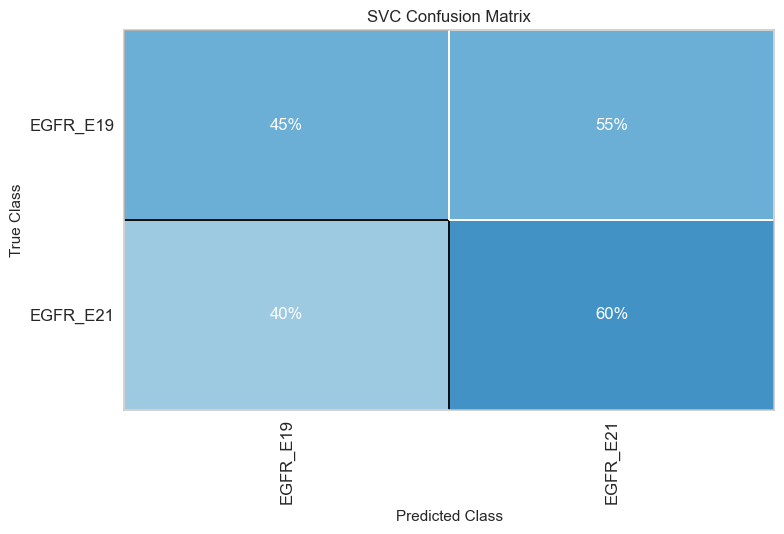

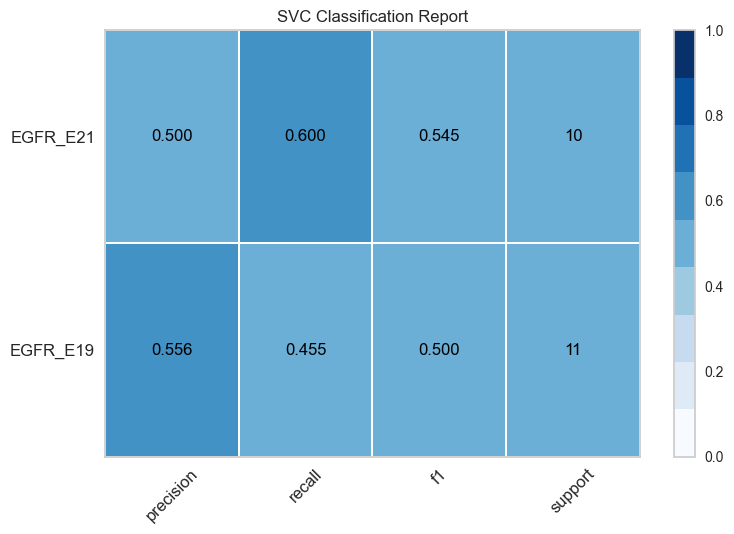

ModelError: no curves will be drawn; set binary=True.

In [76]:
# Visualization of Results --> Feature Importances
# svm_tuned1 = wrap(svm_tuned)
# plot_feature_importances(svm_tuned)
# report_results_quickly(svm_tuned)
plot_results(svm_tuned)
# plot_learning_curve(svm_tuned)

In [79]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.5714285714285714

In [80]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF181-XGB73', Save_format = 'csv',Save_type = 'col')

In [81]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF181-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.58      0.64      0.61        11
    EGFR E21       0.56      0.50      0.53        10

    accuracy                           0.57        21
   macro avg       0.57      0.57      0.57        21
weighted avg       0.57      0.57      0.57        21

precision 0.5555555555555556 accuracy 0.5714285714285714 recall 0.5 auc 0.5681818181818182


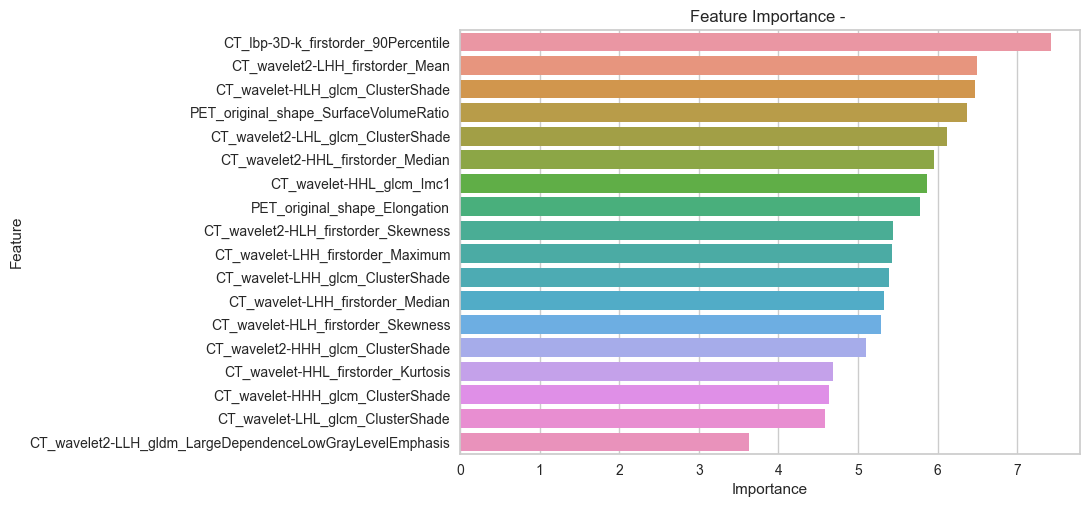

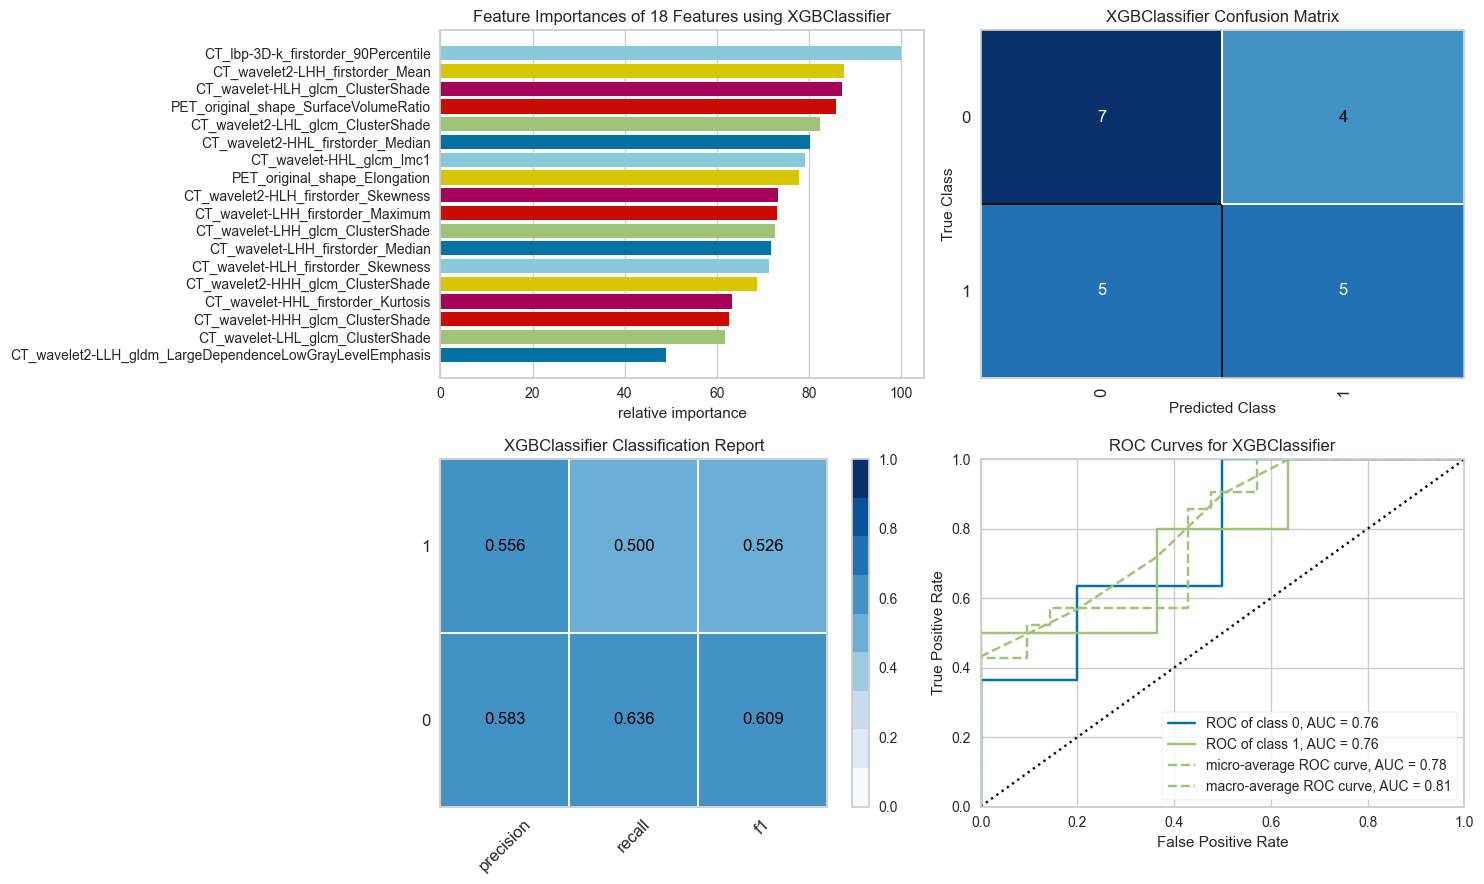

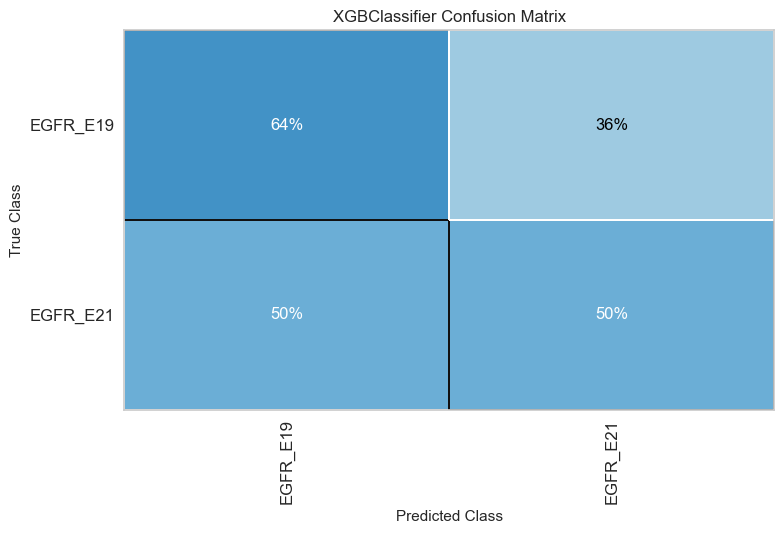

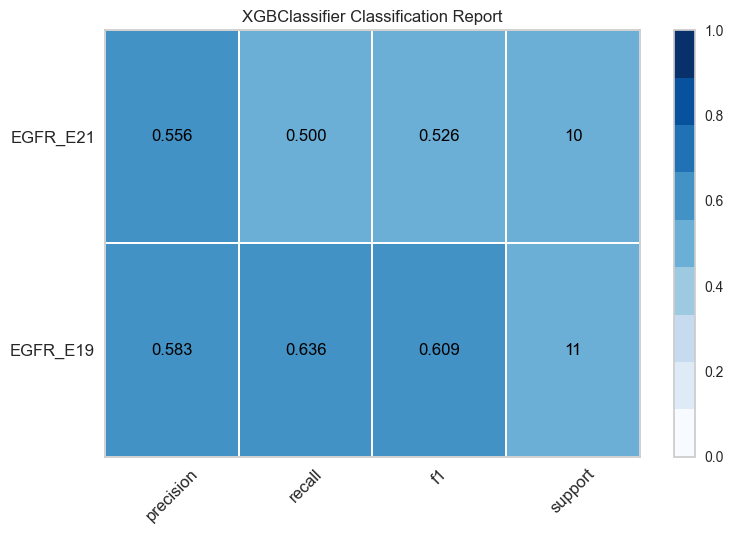

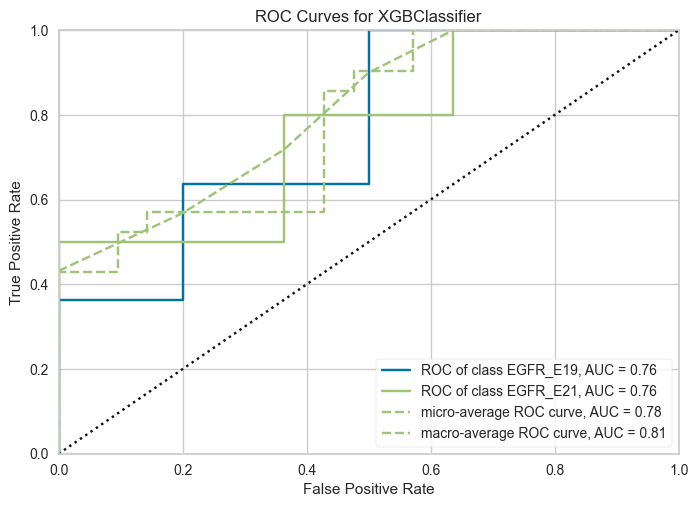

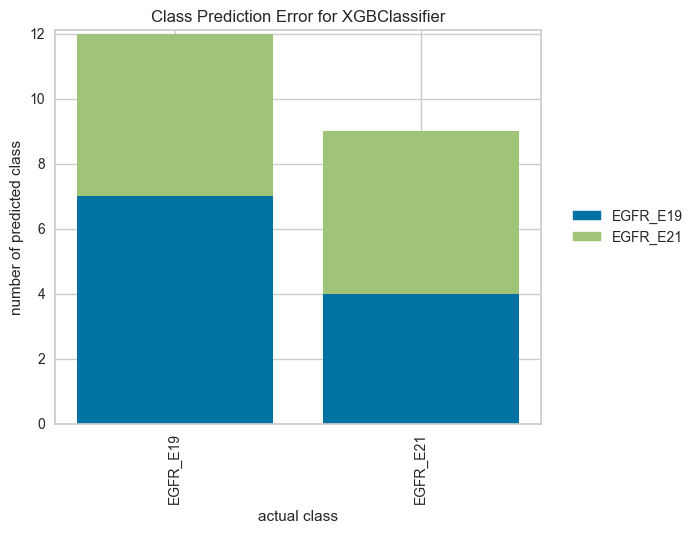

In [82]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [84]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6666666666666666

In [85]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF181-lgb73', Save_format = 'csv',Save_type = 'col')

In [86]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF181-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.70      0.64      0.67        11
    EGFR E21       0.64      0.70      0.67        10

    accuracy                           0.67        21
   macro avg       0.67      0.67      0.67        21
weighted avg       0.67      0.67      0.67        21

precision 0.6363636363636364 accuracy 0.6666666666666666 recall 0.7 auc 0.6681818181818182


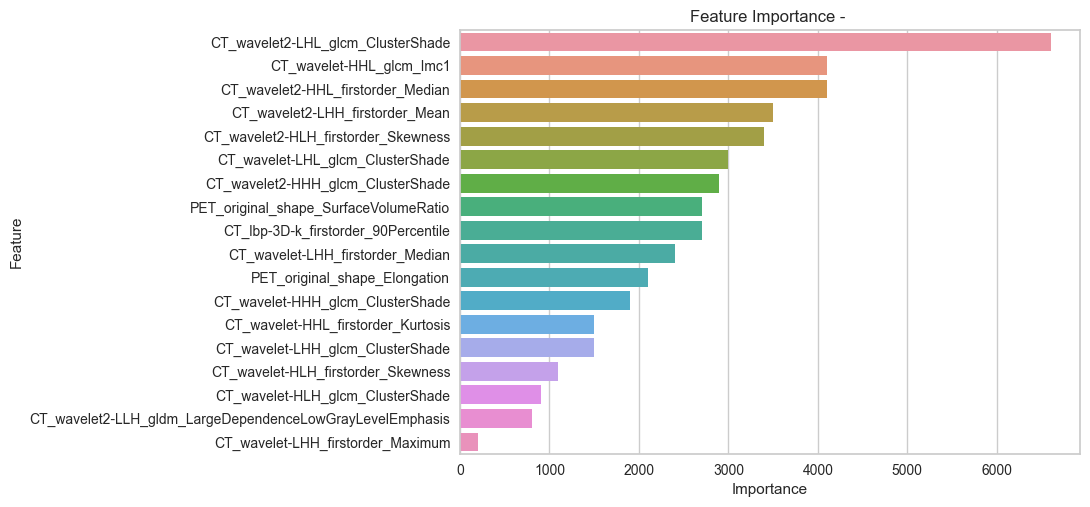

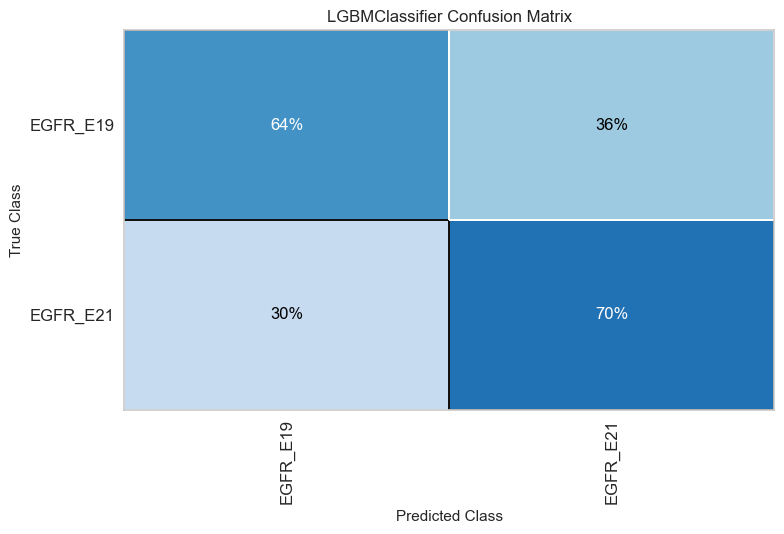

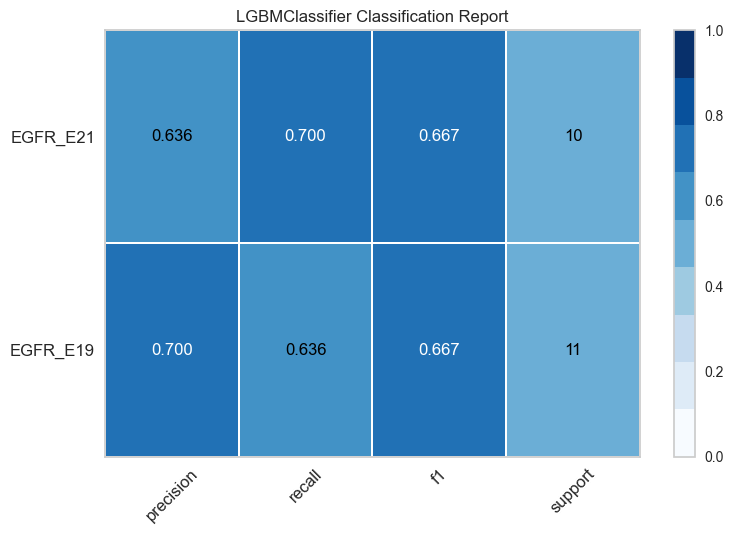

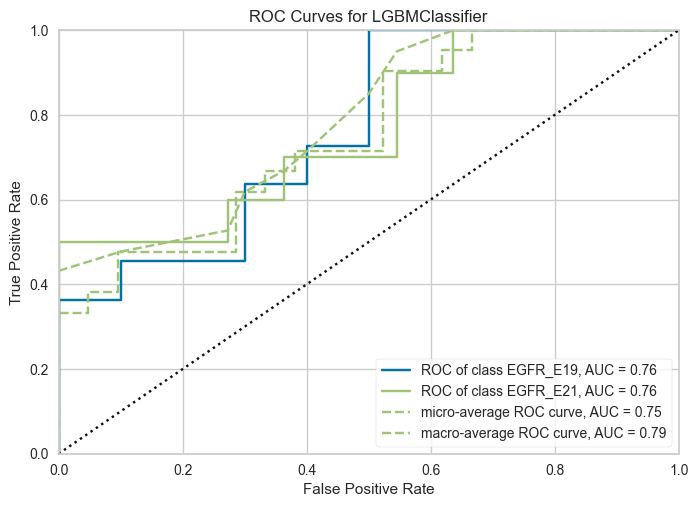

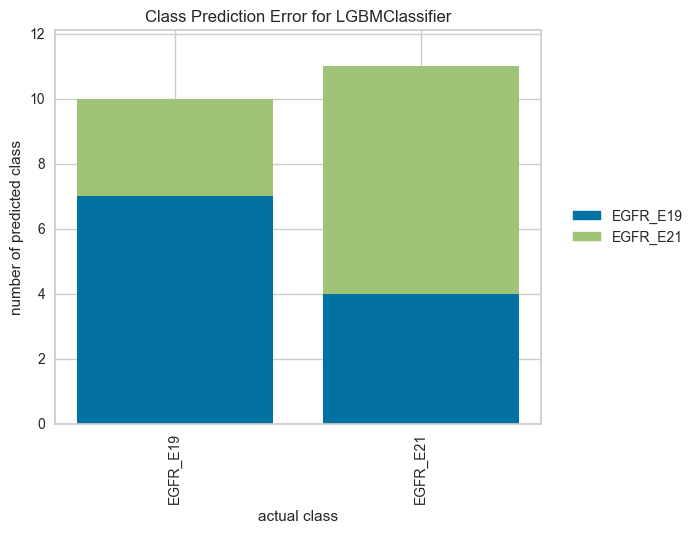

In [87]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.431818
RF: 0.809091
XGBoost: 0.568182
LightGBM: 0.668182
0:	learn: 0.6860510	total: 517us	remaining: 258ms
1:	learn: 0.6776579	total: 1.03ms	remaining: 257ms
2:	learn: 0.6718270	total: 1.45ms	remaining: 240ms
3:	learn: 0.6619279	total: 1.85ms	remaining: 229ms
4:	learn: 0.6503784	total: 2.25ms	remaining: 222ms
5:	learn: 0.6350582	total: 2.64ms	remaining: 218ms
6:	learn: 0.6258264	total: 3.06ms	remaining: 215ms
7:	learn: 0.6170739	total: 3.46ms	remaining: 213ms
8:	learn: 0.6107329	total: 3.86ms	remaining: 210ms
9:	learn: 0.6016357	total: 4.26ms	remaining: 209ms
10:	learn: 0.5866378	total: 4.66ms	remaining: 207ms
11:	learn: 0.5756072	total: 5.07ms	remaining: 206ms
12:	learn: 0.5657864	total: 5.47ms	remaining: 205ms
13:	learn: 0.5589144	total: 5.85ms	remaining: 203ms
14:	learn: 0.5520324	total: 6.23ms	remaining: 201ms
15:	learn: 0.5473911	total: 6.62ms	remaining: 200ms
16:	learn: 0.5409911

450:	learn: 0.0165967	total: 177ms	remaining: 19.2ms
451:	learn: 0.0165552	total: 178ms	remaining: 18.9ms
452:	learn: 0.0164981	total: 178ms	remaining: 18.5ms
453:	learn: 0.0164290	total: 179ms	remaining: 18.1ms
454:	learn: 0.0163459	total: 179ms	remaining: 17.7ms
455:	learn: 0.0162806	total: 179ms	remaining: 17.3ms
456:	learn: 0.0162280	total: 180ms	remaining: 16.9ms
457:	learn: 0.0161713	total: 180ms	remaining: 16.5ms
458:	learn: 0.0161323	total: 181ms	remaining: 16.1ms
459:	learn: 0.0160711	total: 181ms	remaining: 15.7ms
460:	learn: 0.0160062	total: 181ms	remaining: 15.4ms
461:	learn: 0.0159693	total: 182ms	remaining: 15ms
462:	learn: 0.0159014	total: 182ms	remaining: 14.6ms
463:	learn: 0.0158464	total: 183ms	remaining: 14.2ms
464:	learn: 0.0158291	total: 183ms	remaining: 13.8ms
465:	learn: 0.0157374	total: 184ms	remaining: 13.4ms
466:	learn: 0.0156921	total: 184ms	remaining: 13ms
467:	learn: 0.0156525	total: 184ms	remaining: 12.6ms
468:	learn: 0.0155791	total: 185ms	remaining: 12.2

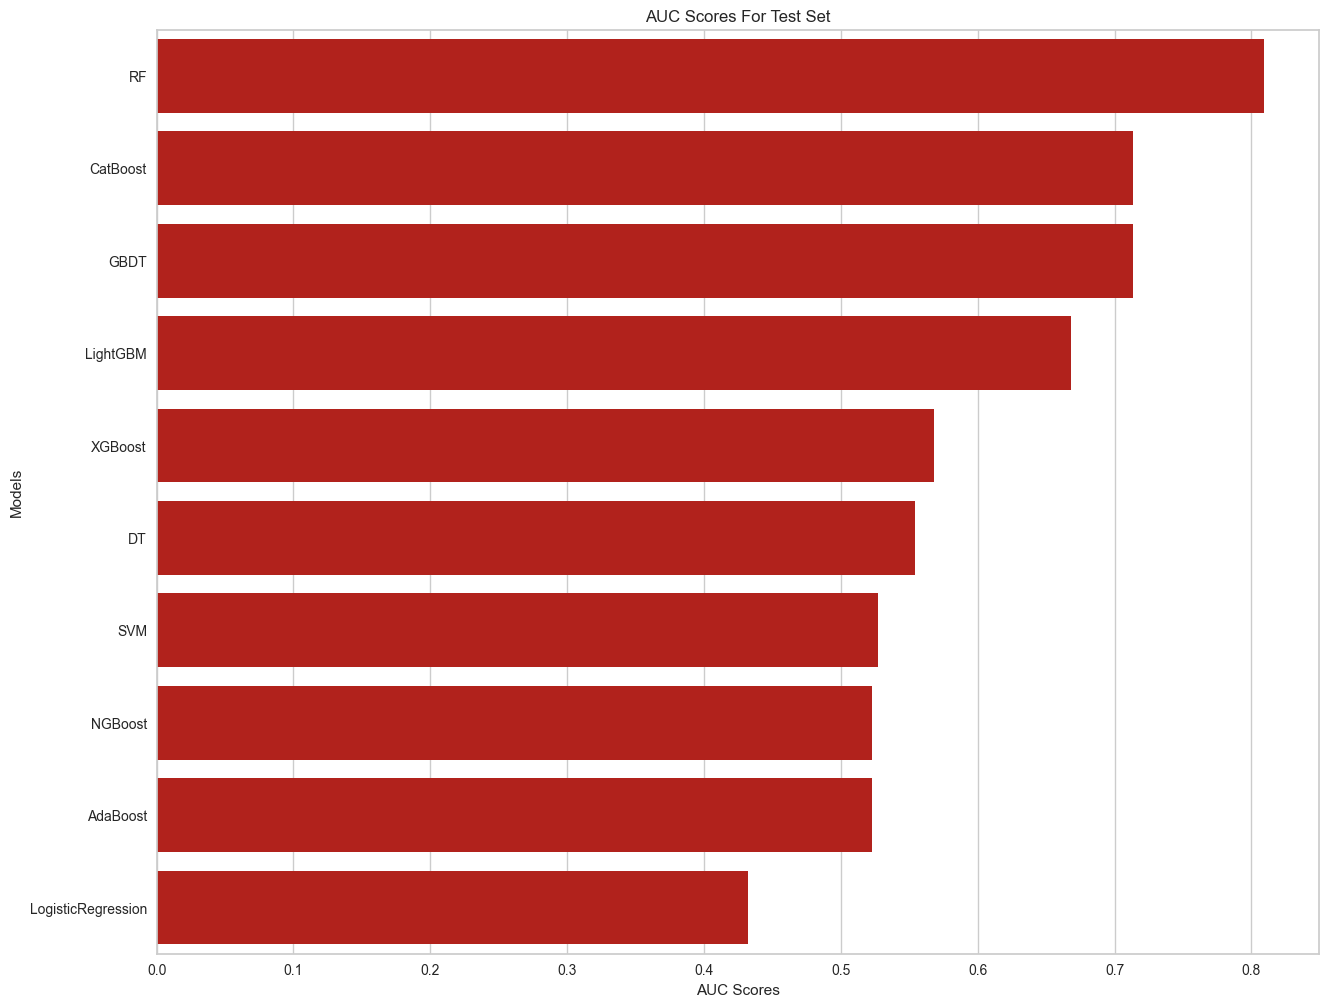

In [88]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned),
                ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
                ('NGBoost', ngb_tuned),
                ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [89]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=lgbm_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


0:	learn: 0.6765325	total: 439us	remaining: 219ms
1:	learn: 0.6613603	total: 1.01ms	remaining: 251ms
2:	learn: 0.6548746	total: 1.39ms	remaining: 230ms
3:	learn: 0.6422712	total: 1.76ms	remaining: 218ms
4:	learn: 0.6303430	total: 2.12ms	remaining: 210ms
5:	learn: 0.6193413	total: 2.48ms	remaining: 204ms
6:	learn: 0.6058455	total: 2.85ms	remaining: 201ms
7:	learn: 0.5957232	total: 3.27ms	remaining: 201ms
8:	learn: 0.5792336	total: 3.61ms	remaining: 197ms
9:	learn: 0.5683978	total: 3.98ms	remaining: 195ms
10:	learn: 0.5618641	total: 4.33ms	remaining: 193ms
11:	learn: 0.5526620	total: 4.69ms	remaining: 191ms
12:	learn: 0.5457423	total: 5.04ms	remaining: 189ms
13:	learn: 0.5408318	total: 5.39ms	remaining: 187ms
14:	learn: 0.5308841	total: 5.75ms	remaining: 186ms
15:	learn: 0.5230032	total: 6.11ms	remaining: 185ms
16:	learn: 0.5133532	total: 6.46ms	remaining: 184ms
17:	learn: 0.5056238	total: 6.79ms	remaining: 182ms
18:	learn: 0.4971159	total: 7.13ms	remaining: 181ms
19:	learn: 0.4892974	to

426:	learn: 0.0088471	total: 149ms	remaining: 25.4ms
427:	learn: 0.0088088	total: 149ms	remaining: 25.1ms
428:	learn: 0.0087907	total: 149ms	remaining: 24.7ms
429:	learn: 0.0087544	total: 150ms	remaining: 24.4ms
430:	learn: 0.0087362	total: 150ms	remaining: 24ms
431:	learn: 0.0087002	total: 150ms	remaining: 23.7ms
432:	learn: 0.0086631	total: 151ms	remaining: 23.3ms
433:	learn: 0.0086334	total: 151ms	remaining: 23ms
434:	learn: 0.0086046	total: 151ms	remaining: 22.6ms
435:	learn: 0.0085743	total: 152ms	remaining: 22.3ms
436:	learn: 0.0085441	total: 152ms	remaining: 21.9ms
437:	learn: 0.0085076	total: 152ms	remaining: 21.6ms
438:	learn: 0.0084858	total: 153ms	remaining: 21.2ms
439:	learn: 0.0084500	total: 153ms	remaining: 20.9ms
440:	learn: 0.0084224	total: 153ms	remaining: 20.5ms
441:	learn: 0.0083949	total: 154ms	remaining: 20.2ms
442:	learn: 0.0083689	total: 154ms	remaining: 19.8ms
443:	learn: 0.0083429	total: 154ms	remaining: 19.5ms
444:	learn: 0.0083019	total: 155ms	remaining: 19.1

306:	learn: 0.0124531	total: 104ms	remaining: 65.2ms
307:	learn: 0.0123529	total: 104ms	remaining: 64.9ms
308:	learn: 0.0123197	total: 104ms	remaining: 64.6ms
309:	learn: 0.0122425	total: 105ms	remaining: 64.3ms
310:	learn: 0.0121931	total: 105ms	remaining: 63.9ms
311:	learn: 0.0121254	total: 106ms	remaining: 63.6ms
312:	learn: 0.0120771	total: 106ms	remaining: 63.3ms
313:	learn: 0.0119862	total: 106ms	remaining: 62.9ms
314:	learn: 0.0119206	total: 107ms	remaining: 62.6ms
315:	learn: 0.0118421	total: 107ms	remaining: 62.3ms
316:	learn: 0.0117527	total: 107ms	remaining: 61.9ms
317:	learn: 0.0116643	total: 108ms	remaining: 61.6ms
318:	learn: 0.0115806	total: 108ms	remaining: 61.2ms
319:	learn: 0.0114975	total: 108ms	remaining: 60.9ms
320:	learn: 0.0114008	total: 109ms	remaining: 60.6ms
321:	learn: 0.0113226	total: 109ms	remaining: 60.3ms
322:	learn: 0.0112571	total: 109ms	remaining: 59.9ms
323:	learn: 0.0112128	total: 110ms	remaining: 59.6ms
324:	learn: 0.0111537	total: 110ms	remaining: 

[iter 0] loss=0.6928 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.0351 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.0351 val_loss=0.00

340:	learn: 0.0254035	total: 158ms	remaining: 73.8ms
341:	learn: 0.0253144	total: 159ms	remaining: 73.3ms
342:	learn: 0.0252080	total: 159ms	remaining: 72.8ms
343:	learn: 0.0251127	total: 160ms	remaining: 72.4ms
344:	learn: 0.0250346	total: 160ms	remaining: 71.9ms
345:	learn: 0.0248641	total: 160ms	remaining: 71.4ms
346:	learn: 0.0247825	total: 161ms	remaining: 70.9ms
347:	learn: 0.0245519	total: 161ms	remaining: 70.4ms
348:	learn: 0.0244180	total: 162ms	remaining: 69.9ms
349:	learn: 0.0242114	total: 162ms	remaining: 69.4ms
350:	learn: 0.0240991	total: 162ms	remaining: 69ms
351:	learn: 0.0239754	total: 163ms	remaining: 68.5ms
352:	learn: 0.0238278	total: 163ms	remaining: 68ms
353:	learn: 0.0236346	total: 164ms	remaining: 67.5ms
354:	learn: 0.0235113	total: 164ms	remaining: 67.1ms
355:	learn: 0.0233942	total: 165ms	remaining: 66.7ms
356:	learn: 0.0233251	total: 165ms	remaining: 66.2ms
357:	learn: 0.0232494	total: 166ms	remaining: 65.7ms
358:	learn: 0.0231265	total: 166ms	remaining: 65.2

[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.1701 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.1695 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.1695 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.1695 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.1695 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.1695 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.1695 val_loss=0.00

433:	learn: 0.0091582	total: 155ms	remaining: 23.6ms
434:	learn: 0.0091178	total: 156ms	remaining: 23.3ms
435:	learn: 0.0090850	total: 156ms	remaining: 22.9ms
436:	learn: 0.0090598	total: 157ms	remaining: 22.6ms
437:	learn: 0.0090476	total: 157ms	remaining: 22.2ms
438:	learn: 0.0090220	total: 157ms	remaining: 21.8ms
439:	learn: 0.0089762	total: 158ms	remaining: 21.5ms
440:	learn: 0.0089550	total: 158ms	remaining: 21.1ms
441:	learn: 0.0089314	total: 158ms	remaining: 20.8ms
442:	learn: 0.0088764	total: 159ms	remaining: 20.4ms
443:	learn: 0.0088657	total: 159ms	remaining: 20.1ms
444:	learn: 0.0088540	total: 159ms	remaining: 19.7ms
445:	learn: 0.0088298	total: 160ms	remaining: 19.3ms
446:	learn: 0.0087856	total: 160ms	remaining: 19ms
447:	learn: 0.0087631	total: 160ms	remaining: 18.6ms
448:	learn: 0.0087430	total: 161ms	remaining: 18.2ms
449:	learn: 0.0087187	total: 161ms	remaining: 17.9ms
450:	learn: 0.0086990	total: 161ms	remaining: 17.5ms
451:	learn: 0.0086755	total: 162ms	remaining: 17

293:	learn: 0.0153984	total: 101ms	remaining: 70.9ms
294:	learn: 0.0153188	total: 102ms	remaining: 70.7ms
295:	learn: 0.0151836	total: 102ms	remaining: 70.4ms
296:	learn: 0.0150966	total: 102ms	remaining: 70ms
297:	learn: 0.0150133	total: 103ms	remaining: 69.7ms
298:	learn: 0.0148878	total: 103ms	remaining: 69.4ms
299:	learn: 0.0148091	total: 104ms	remaining: 69.1ms
300:	learn: 0.0147094	total: 104ms	remaining: 68.8ms
301:	learn: 0.0146338	total: 104ms	remaining: 68.4ms
302:	learn: 0.0145660	total: 105ms	remaining: 68.1ms
303:	learn: 0.0144718	total: 105ms	remaining: 67.7ms
304:	learn: 0.0143978	total: 105ms	remaining: 67.4ms
305:	learn: 0.0143333	total: 106ms	remaining: 67ms
306:	learn: 0.0142316	total: 106ms	remaining: 66.7ms
307:	learn: 0.0141421	total: 107ms	remaining: 66.4ms
308:	learn: 0.0140775	total: 107ms	remaining: 66.1ms
309:	learn: 0.0140420	total: 107ms	remaining: 65.7ms
310:	learn: 0.0139792	total: 108ms	remaining: 65.4ms
311:	learn: 0.0139441	total: 108ms	remaining: 65ms

[iter 0] loss=0.6928 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.0546 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.0545 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.0545 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.0545 val_loss=0.00

LinAlgError: Singular matrix

In [90]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [91]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [88]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF181-stack73', Save_format = 'csv',Save_type = 'col')

In [92]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2/RFE-RF-GB/RF181")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [93]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [94]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/testZscore-RF18.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [95]:
OSPath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2"

In [96]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF181/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-RF181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.67      0.59      0.62        17
    EGFR_E21       0.50      0.58      0.54        12

    accuracy                           0.59        29
   macro avg       0.58      0.59      0.58        29
weighted avg       0.60      0.59      0.59        29

precision 0.5 accuracy 0.5862068965517241 recall 0.5833333333333334 auc 0.5857843137254902


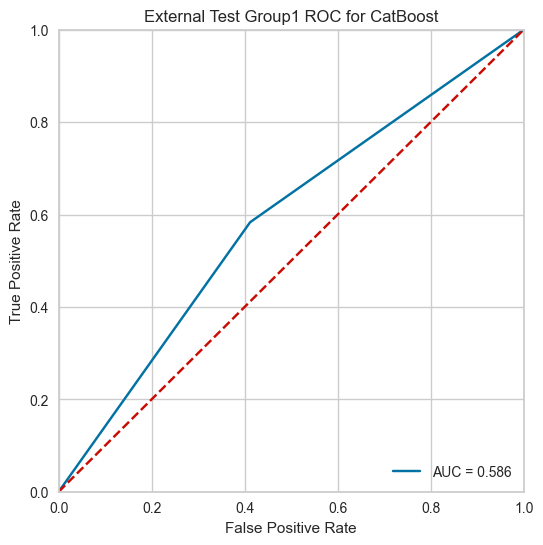

In [97]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [98]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10  7]
 [ 5  7]]
Normalized confusion matrix
[[0.59 0.41]
 [0.42 0.58]]


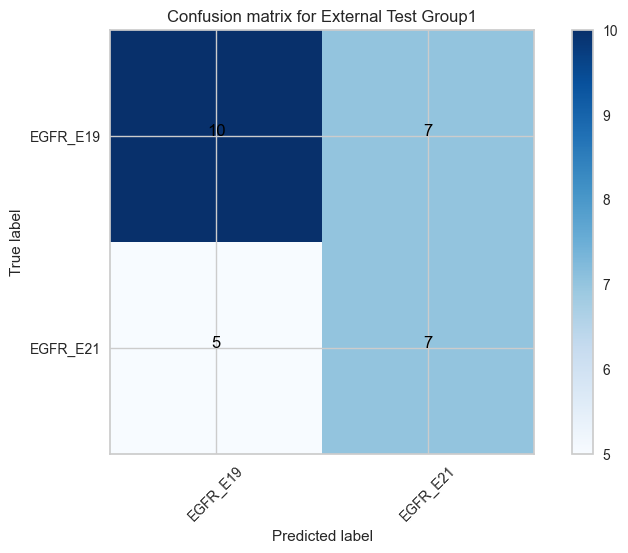

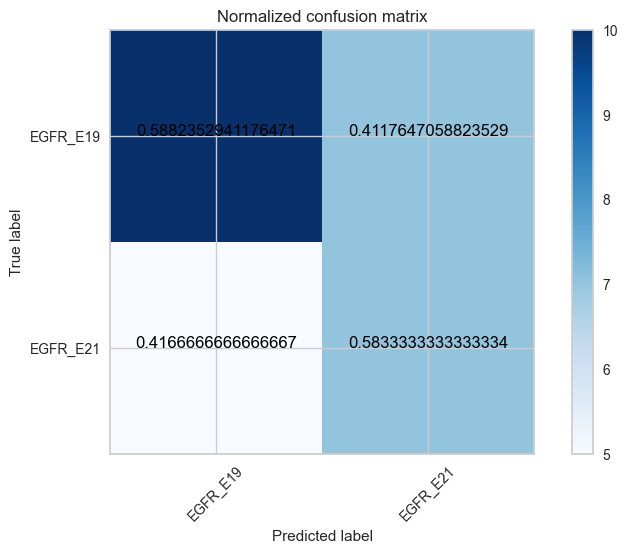

In [99]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [100]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF181/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-RF181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.71      0.59      0.65        17
    EGFR_E21       0.53      0.67      0.59        12

    accuracy                           0.62        29
   macro avg       0.62      0.63      0.62        29
weighted avg       0.64      0.62      0.62        29

precision 0.5333333333333333 accuracy 0.6206896551724138 recall 0.6666666666666666 auc 0.6274509803921569


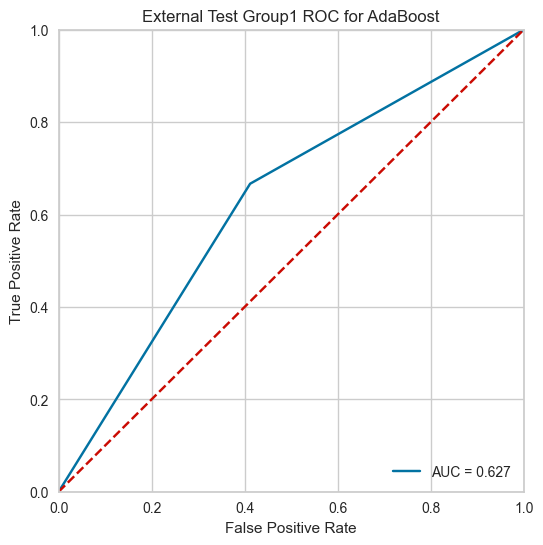

In [101]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [102]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10  7]
 [ 4  8]]
Normalized confusion matrix
[[0.59 0.41]
 [0.33 0.67]]


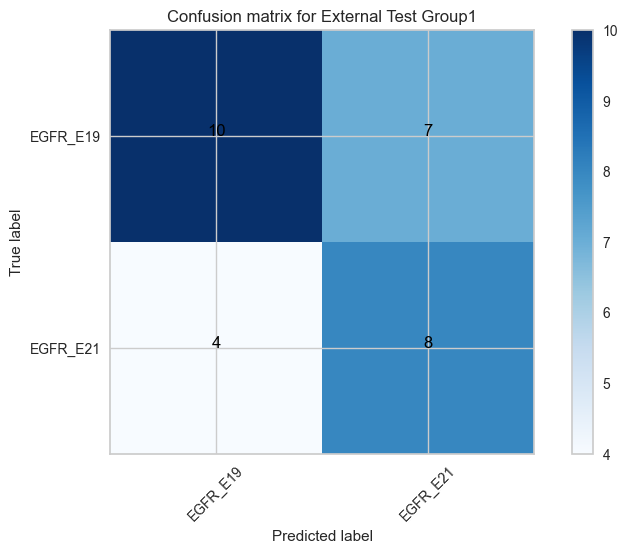

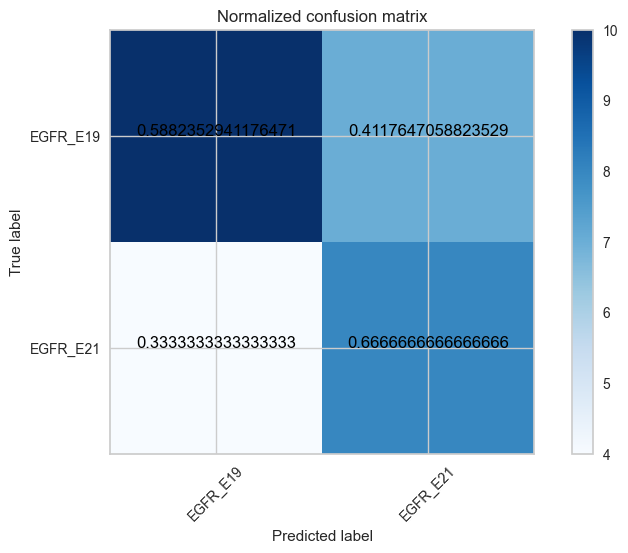

In [103]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [104]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF181/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-RF181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

    EGFR_E19       0.50      0.35      0.41        17
    EGFR_E21       0.35      0.50      0.41        12

    accuracy                           0.41        29
   macro avg       0.43      0.43      0.41        29
weighted avg       0.44      0.41      0.41        29

precision 0.42647058823529416 accuracy 0.41379310344827586 recall 0.42647058823529416 auc 0.42647058823529405


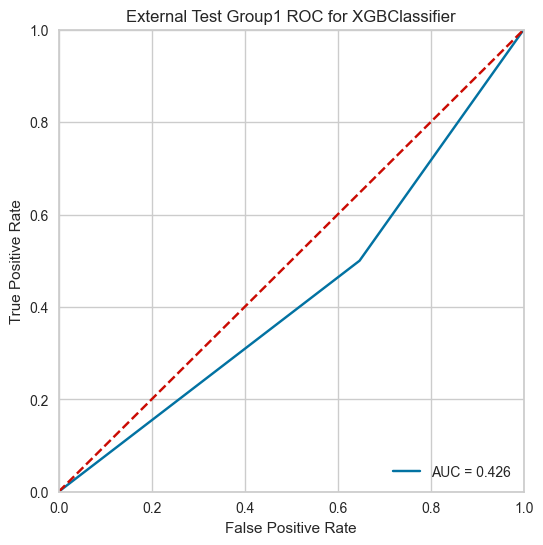

In [105]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [106]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 6 11]
 [ 6  6]]
Normalized confusion matrix
[[0.35 0.65]
 [0.5  0.5 ]]


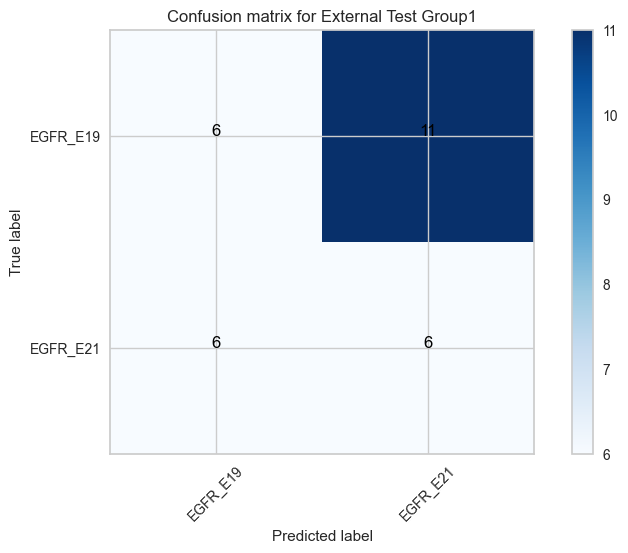

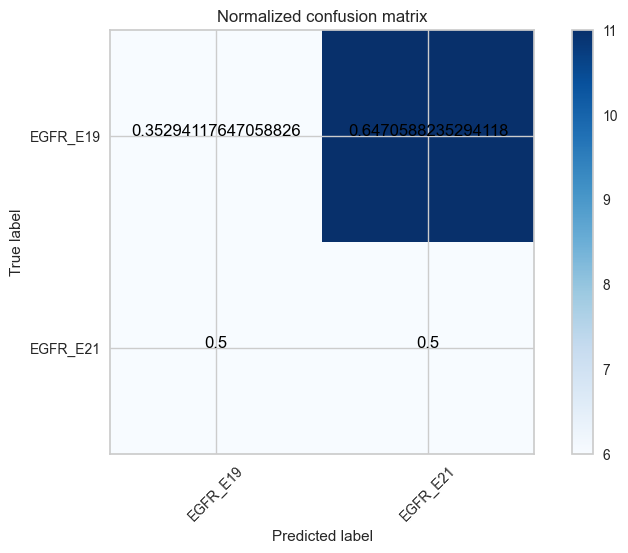

In [107]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [108]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF181/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-RF181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.67      0.47      0.55        17
    EGFR_E21       0.47      0.67      0.55        12

    accuracy                           0.55        29
   macro avg       0.57      0.57      0.55        29
weighted avg       0.59      0.55      0.55        29

precision 0.47058823529411764 accuracy 0.5517241379310345 recall 0.6666666666666666 auc 0.5686274509803921


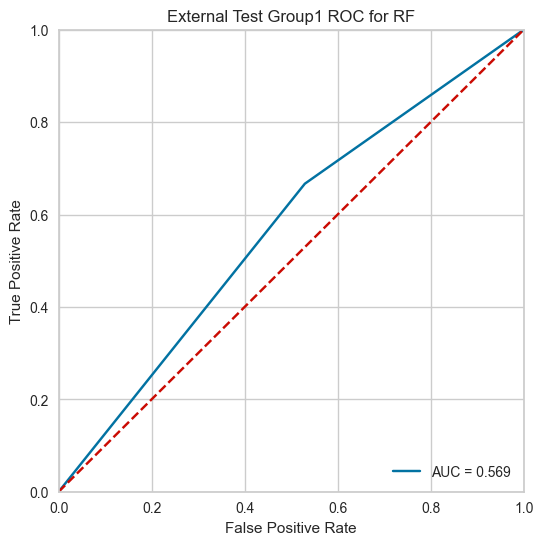

In [109]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[8 9]
 [4 8]]
Normalized confusion matrix
[[0.47 0.53]
 [0.33 0.67]]


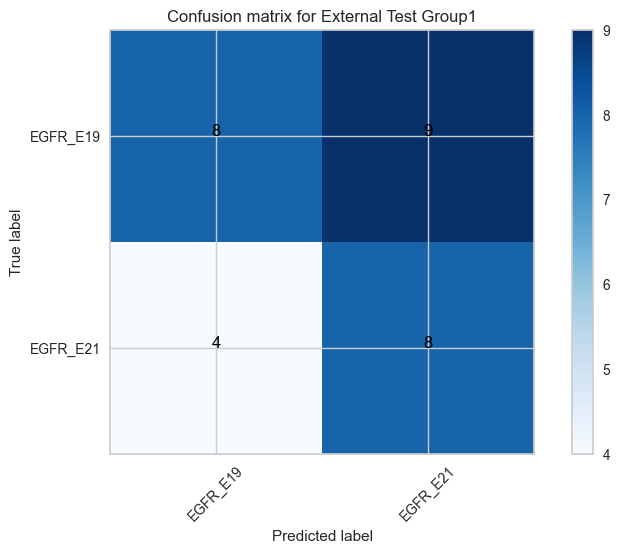

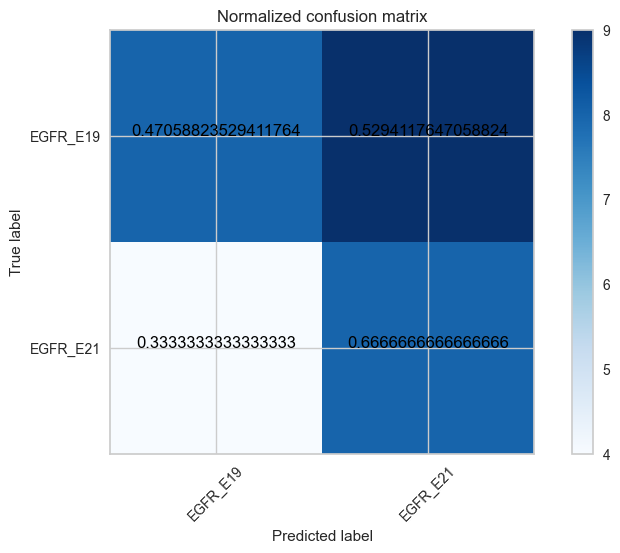

In [110]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [111]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF181/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-RF181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.60      0.35      0.44        17
    EGFR_E21       0.42      0.67      0.52        12

    accuracy                           0.48        29
   macro avg       0.51      0.51      0.48        29
weighted avg       0.53      0.48      0.47        29

precision 0.42105263157894735 accuracy 0.4827586206896552 recall 0.6666666666666666 auc 0.5098039215686274


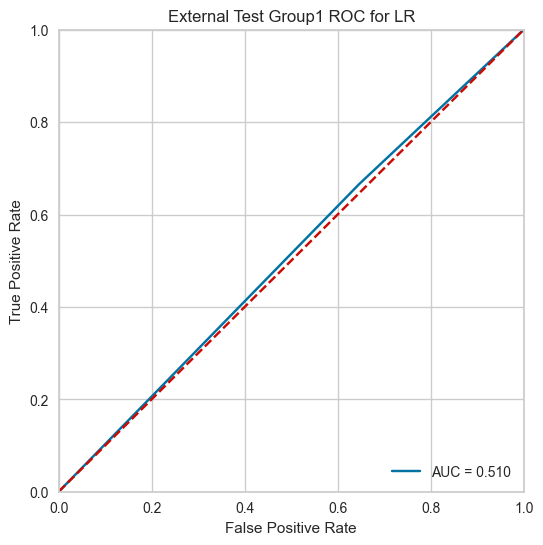

In [112]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 6 11]
 [ 4  8]]
Normalized confusion matrix
[[0.35 0.65]
 [0.33 0.67]]


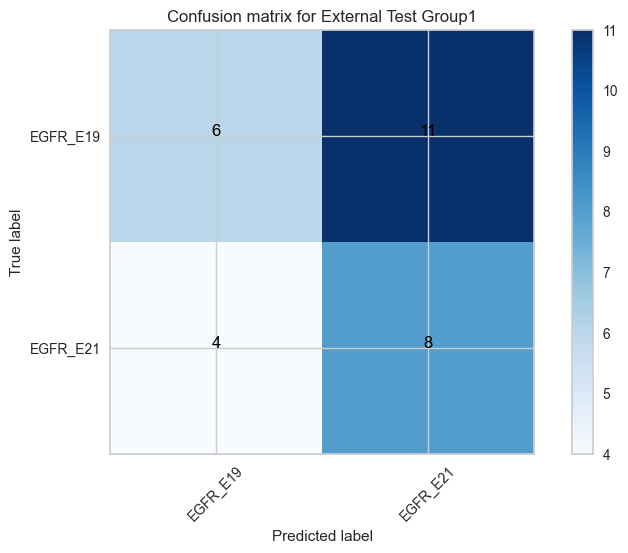

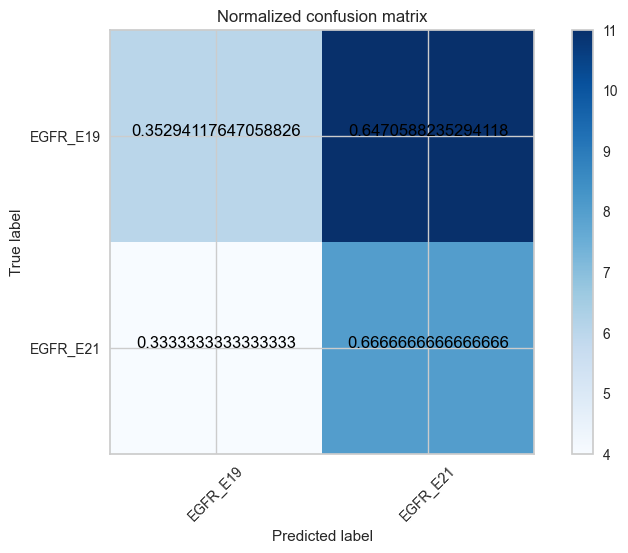

In [113]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [114]:
##DT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF181/DT.pkl'
finalpkl =  OSPath + pathpkl
dt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=dt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-DT-RF181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.67      0.94      0.78        17
    EGFR_E21       0.80      0.33      0.47        12

    accuracy                           0.69        29
   macro avg       0.73      0.64      0.63        29
weighted avg       0.72      0.69      0.65        29

precision 0.8 accuracy 0.6896551724137931 recall 0.3333333333333333 auc 0.6372549019607843


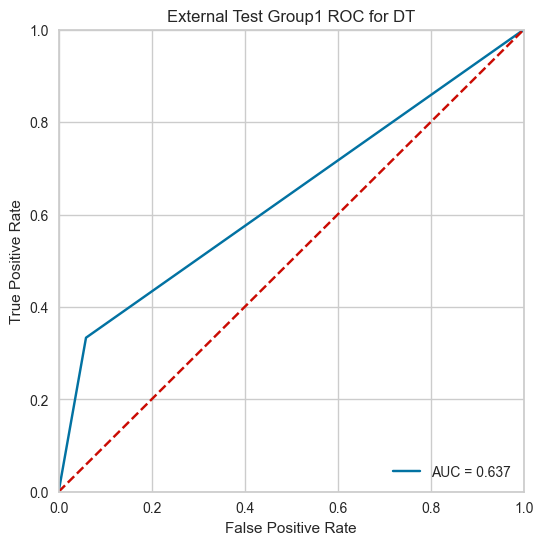

In [115]:
######dt 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[16  1]
 [ 8  4]]
Normalized confusion matrix
[[0.94 0.06]
 [0.67 0.33]]


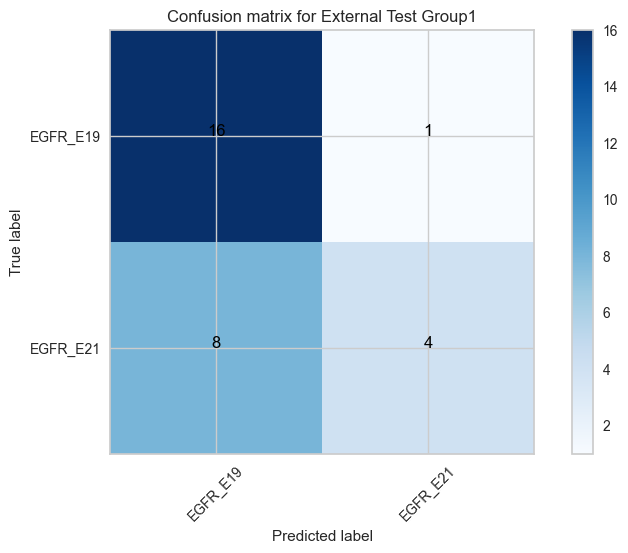

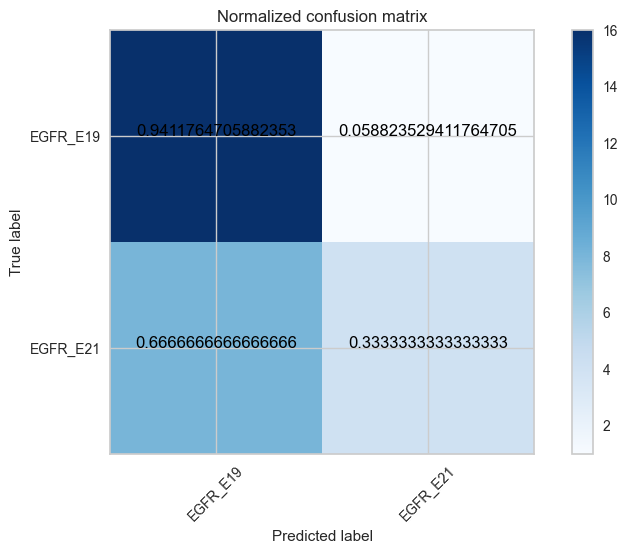

In [116]:
##dt 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [117]:
##NGB 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF181/NGBoost.pkl'
finalpkl =  OSPath + pathpkl
ngb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=ngb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-ngb-RF181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.64      0.41      0.50        17
    EGFR_E21       0.44      0.67      0.53        12

    accuracy                           0.52        29
   macro avg       0.54      0.54      0.52        29
weighted avg       0.56      0.52      0.51        29

precision 0.4444444444444444 accuracy 0.5172413793103449 recall 0.6666666666666666 auc 0.5392156862745098


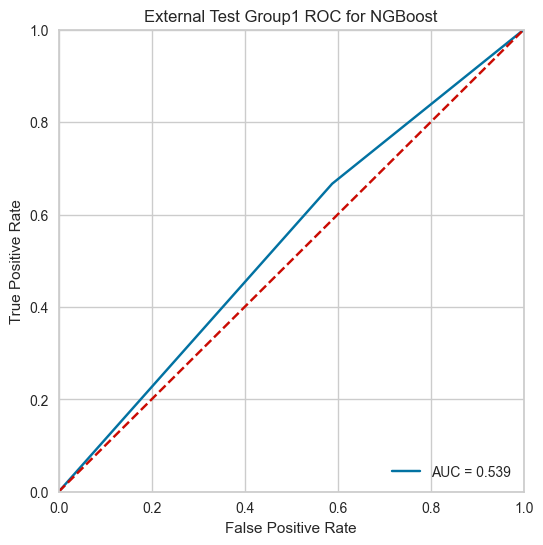

In [118]:
##NGB 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for NGBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 7 10]
 [ 4  8]]
Normalized confusion matrix
[[0.41 0.59]
 [0.33 0.67]]


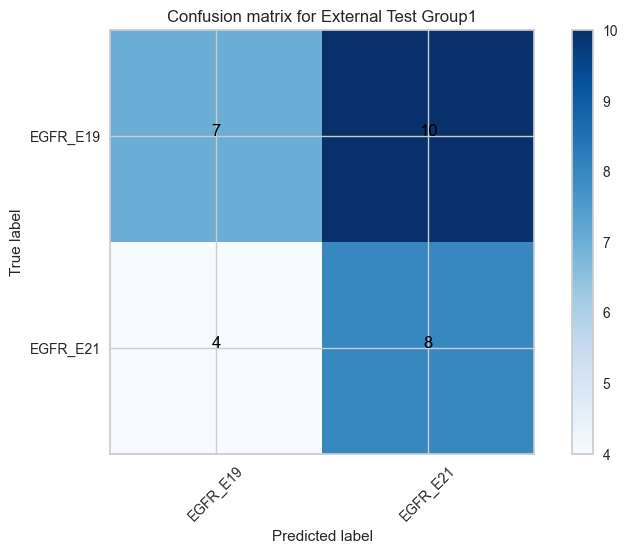

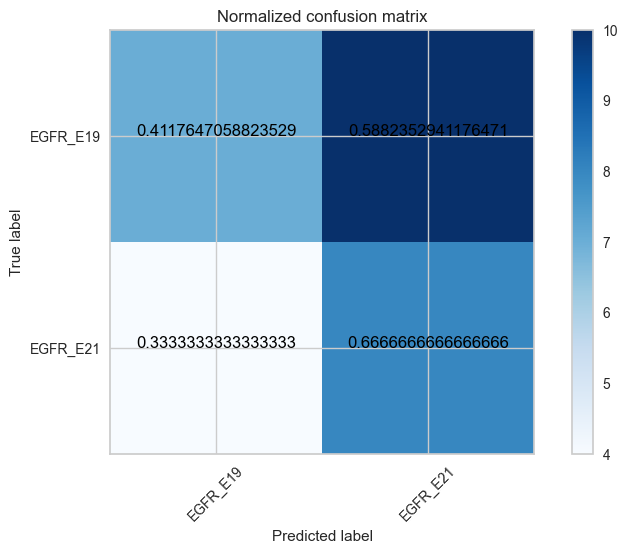

In [119]:
##NGB 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [120]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF181/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-RF181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.67      0.35      0.46        17
    EGFR_E21       0.45      0.75      0.56        12

    accuracy                           0.52        29
   macro avg       0.56      0.55      0.51        29
weighted avg       0.58      0.52      0.50        29

precision 0.45 accuracy 0.5172413793103449 recall 0.75 auc 0.5514705882352942


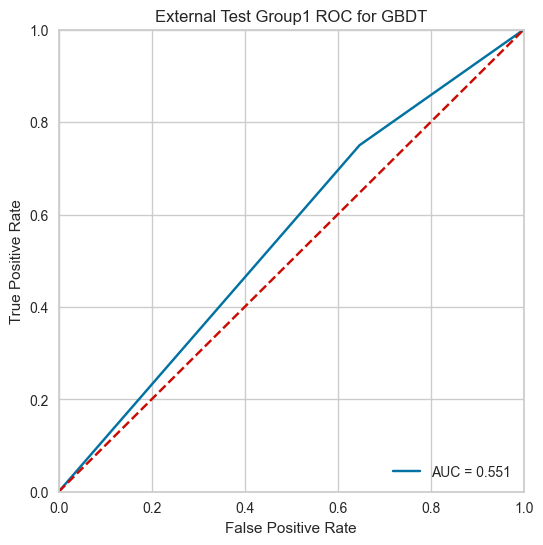

In [121]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 6 11]
 [ 3  9]]
Normalized confusion matrix
[[0.35 0.65]
 [0.25 0.75]]


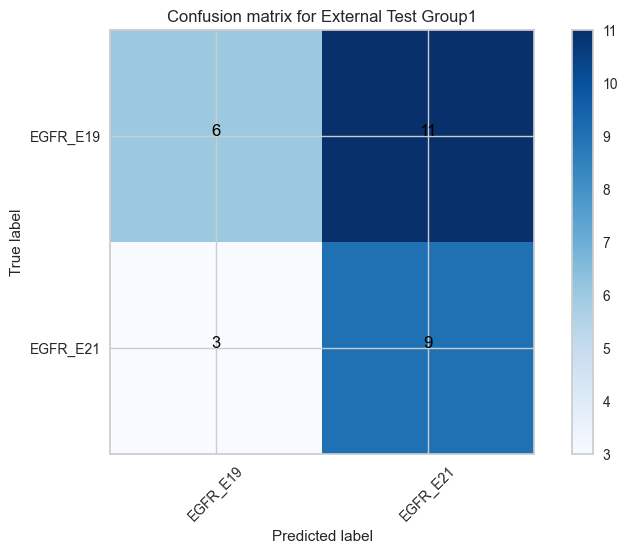

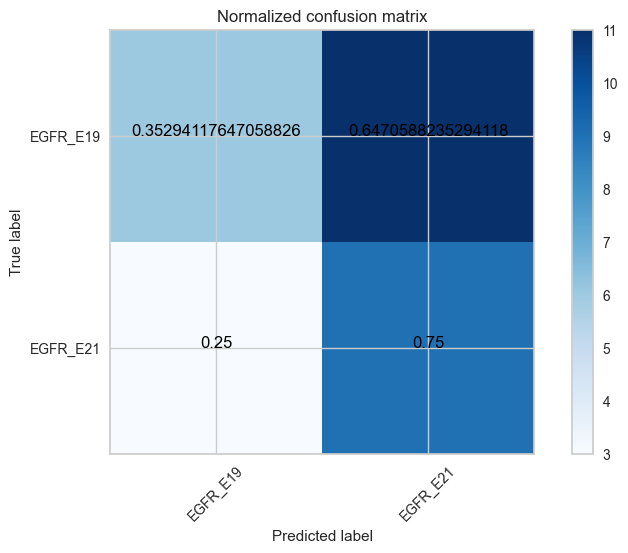

In [122]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [123]:
##svm 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF181/SVM.pkl'
finalpkl =  OSPath + pathpkl
svmt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=svmt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-SVM-RF181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.60      0.35      0.44        17
    EGFR_E21       0.42      0.67      0.52        12

    accuracy                           0.48        29
   macro avg       0.51      0.51      0.48        29
weighted avg       0.53      0.48      0.47        29

precision 0.42105263157894735 accuracy 0.4827586206896552 recall 0.6666666666666666 auc 0.5514705882352942


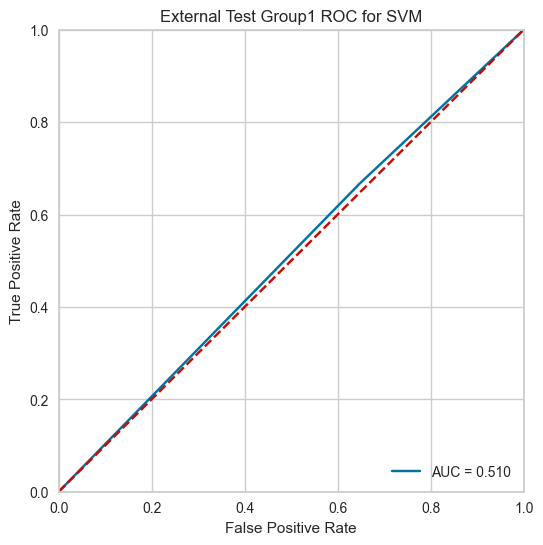

In [124]:
##svm 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 6 11]
 [ 4  8]]
Normalized confusion matrix
[[0.35 0.65]
 [0.33 0.67]]


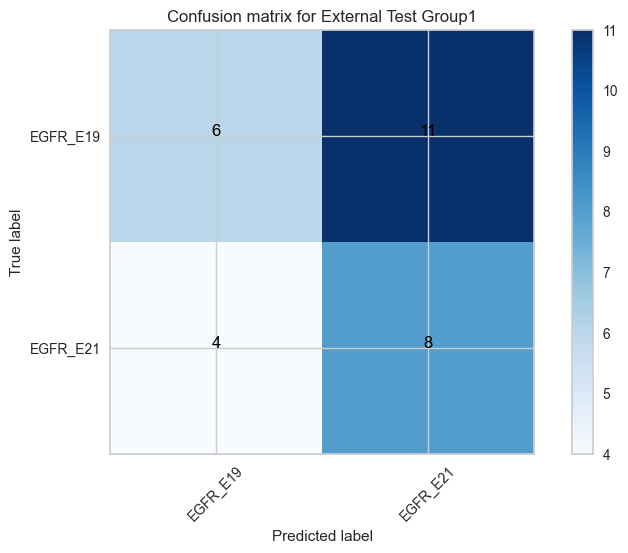

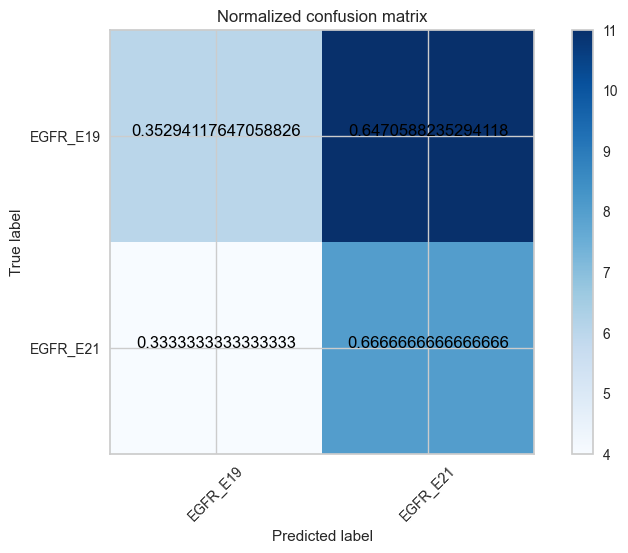

In [125]:
##svm 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [126]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF181/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-RF181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.46      0.35      0.40        17
    EGFR_E21       0.31      0.42      0.36        12

    accuracy                           0.38        29
   macro avg       0.39      0.38      0.38        29
weighted avg       0.40      0.38      0.38        29

precision 0.3125 accuracy 0.3793103448275862 recall 0.4166666666666667 auc 0.38480392156862747


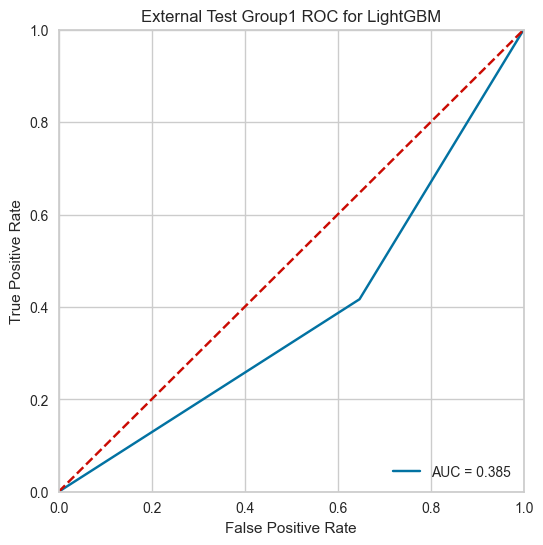

In [127]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 6 11]
 [ 7  5]]
Normalized confusion matrix
[[0.35 0.65]
 [0.58 0.42]]


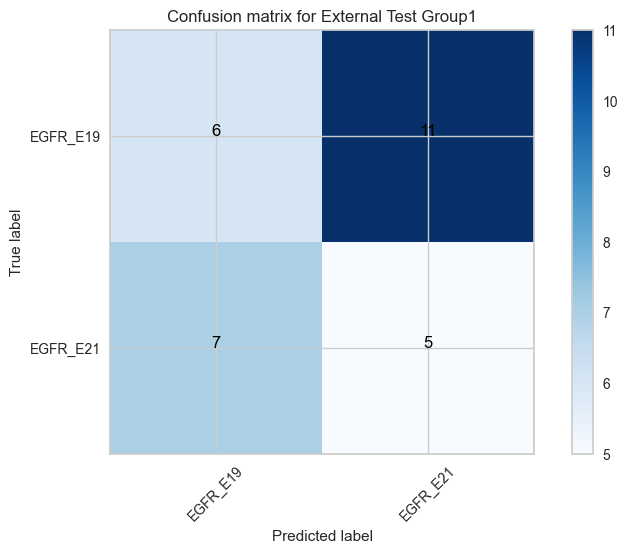

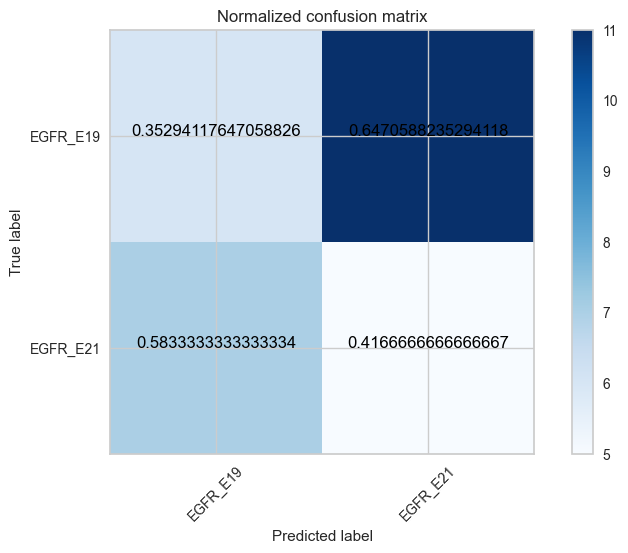

In [128]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()